# Library

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import datetime as dt
import time
import math

In [86]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏßÄÏ†ï
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

# ÏùåÏàò ÌëúÌòÑ
plt.rcParams['axes.unicode_minus'] = False

In [2]:
pd.options.display.float_format = '{:.2f}'.format
# pd.reset_option('display.float_format')

In [3]:
start_time = time.time()

# Fold

In [4]:
raw_fold = 'D:/data/processing/multi_road/raw'
an_fold = 'D:/data/processing/multi_road/analysis'
img_fold = 'D:/data/processing/multi_road/img'

## xlsx to csv

In [5]:
# # 4m 39.4s
# name = 'Îß§Ïó∞RSD_ÎèÑÎ°úÏ∏°Ï†ïÎç∞Ïù¥ÌÑ∞_20221004~20230910'
# file_name = f'{name}.xlsx'
# rsd = pd.read_excel(os.path.join(raw_fold, file_name))
# rsd.info()

In [6]:
# # 12.6s
# rsd.to_csv(os.path.join(raw_fold, f'{name}.csv'), index=False)

# Load
- ÏõêÍ≤© Ï∏°Ï†ï Ï†ïÎ≥¥(ÏûêÏä§ÌÖç Ï†úÍ≥µ)
- Ï∞®ÎüâÏ†úÏõê(ÏûêÏä§ÌÖç Ï†úÍ≥µ)
- Ï†ïÎ∞ÄÍ≤ÄÏÇ¨(ÏûêÏä§ÌÖç Ï†úÍ≥µ)

## ÏõêÍ≤©Ï∏°Ï†ïÏ†ïÎ≥¥

In [7]:
rsd_cdict = {
    'vdfDateTime':'Ï∏°Ï†ïÎÇ†Ïßú',
    'vdfTime':'Ï∏°Ï†ïÏãúÍ∞Ñ',
    'vdfRecordStatus':'Í∏∞Î°ùÏÉÅÌÉú',
    'vdfValid':'Ïú†Ìö®',
    'samSpeed':'ÏÜçÎèÑ',
    'samAccel':'Í∞ÄÏÜçÎèÑ',
    'samFlag':'ÌîåÎûòÍ∑∏',
    'vdfVSP':'VSP',
    'Smoke':'Îß§Ïó∞',
    'V_PLATE':'Ï∞®ÎüâÎ≤àÌò∏',
    'LineNo':'Ï∞®ÏÑ†Î≤àÌò∏',
    'Wind speed':'ÌíçÏÜç',
    'Humidity':'ÏäµÎèÑ', 
    'Temp':'Ïò®ÎèÑ',
    'siteCode':'Ï∏°Ï†ïÏû•ÏÜåÏΩîÎìú',
    }
len(rsd_cdict)

15

In [8]:
# 1s
name = 'Îß§Ïó∞RSD_ÎèÑÎ°úÏ∏°Ï†ïÎç∞Ïù¥ÌÑ∞_20221004~20230910'
file_name = f'{name}.csv'
rsd = pd.read_csv(os.path.join(raw_fold, file_name), usecols=rsd_cdict.keys())
rsd.info()

C:\Users\kbjung\AppData\Local\Temp\ipykernel_20140\4153831191.py:4: DtypeWarning: Columns (73) have mixed types. Specify dtype option on import or set low_memory=False.
  rsd = pd.read_csv(os.path.join(raw_fold, file_name), usecols=rsd_cdict.keys())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398673 entries, 0 to 398672
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   vdfDateTime      398673 non-null  object 
 1   vdfTime          398673 non-null  object 
 2   vdfRecordStatus  398673 non-null  object 
 3   vdfValid         398673 non-null  object 
 4   samSpeed         395272 non-null  float64
 5   samAccel         395272 non-null  float64
 6   samFlag          395272 non-null  object 
 7   vdfVSP           395272 non-null  float64
 8   Smoke            398673 non-null  float64
 9   V_PLATE          398673 non-null  object 
 10  LineNo           117903 non-null  float64
 11  Wind speed       26712 non-null   float64
 12  Humidity         99951 non-null   float64
 13  Temp             398649 non-null  float64
 14  siteCode         150 non-null     object 
dtypes: float64(8), object(7)
memory usage: 45.6+ MB


In [9]:
rsd.columns

Index(['vdfDateTime', 'vdfTime', 'vdfRecordStatus', 'vdfValid', 'samSpeed',
       'samAccel', 'samFlag', 'vdfVSP', 'Smoke', 'V_PLATE', 'LineNo',
       'Wind speed', 'Humidity', 'Temp', 'siteCode'],
      dtype='object')

In [10]:
rsdr = rsd.rename(columns=rsd_cdict)
rsdr.columns

Index(['Ï∏°Ï†ïÎÇ†Ïßú', 'Ï∏°Ï†ïÏãúÍ∞Ñ', 'Í∏∞Î°ùÏÉÅÌÉú', 'Ïú†Ìö®', 'ÏÜçÎèÑ', 'Í∞ÄÏÜçÎèÑ', 'ÌîåÎûòÍ∑∏', 'VSP', 'Îß§Ïó∞', 'Ï∞®ÎüâÎ≤àÌò∏',
       'Ï∞®ÏÑ†Î≤àÌò∏', 'ÌíçÏÜç', 'ÏäµÎèÑ', 'Ïò®ÎèÑ', 'Ï∏°Ï†ïÏû•ÏÜåÏΩîÎìú'],
      dtype='object')

In [11]:
rsdr.head()

Ï∏°Ï†ïÎÇ†Ïßú      Ï∏°Ï†ïÏãúÍ∞Ñ Í∏∞Î°ùÏÉÅÌÉú Ïú†Ìö®    ÏÜçÎèÑ  Í∞ÄÏÜçÎèÑ ÌîåÎûòÍ∑∏   VSP   Îß§Ïó∞     Ï∞®ÎüâÎ≤àÌò∏  Ï∞®ÏÑ†Î≤àÌò∏  ÌíçÏÜç  \
0  10-04-2022  10:31:20    N  V 71.60 0.00   V 17.89 0.60  60Ï†Ä3406   NaN NaN   
1  10-04-2022  10:31:46    N  V 60.70 0.00   V  2.65 0.80  41Íµ¨0483   NaN NaN   
2  10-04-2022  10:31:58    N  V 50.60 0.40   V 13.42 0.70  80Îü¨0579   NaN NaN   
3  10-04-2022  10:32:47    N  V 53.30 1.40   V 18.71 0.90  94ÎàÑ0128   NaN NaN   
4  10-04-2022  10:34:03    N  V 36.10 0.50   V  9.51 0.70  60Ïàò4386   NaN NaN   

   ÏäµÎèÑ   Ïò®ÎèÑ  Ï∏°Ï†ïÏû•ÏÜåÏΩîÎìú  
0 NaN 0.00  JAS001  
1 NaN 0.00     NaN  
2 NaN 0.00     NaN  
3 NaN 0.00     NaN  
4 NaN 0.00     NaN

### [Ï∂úÎ†•] csv

In [12]:
name

'Îß§Ïó∞RSD_ÎèÑÎ°úÏ∏°Ï†ïÎç∞Ïù¥ÌÑ∞_20221004~20230910'

In [13]:
# # 1s
# rsd.to_csv(os.path.join(raw_fold, f'{name}.csv'), index=False)

## Ï∞®ÎüâÏ†úÏõê
- 2023.09.20 Í∏∞Ï§Ä

In [14]:
# 0.5s
cs = pd.read_csv(os.path.join(raw_fold, '230920_Ï∞®ÎüâÏ†úÏõê.csv'))
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147895 entries, 0 to 147894
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Ï∞®ÎüâÎ≤àÌò∏    147895 non-null  object 
 1   Ïó∞Î£å      141396 non-null  object 
 2   Ïó∞Ïãù      141439 non-null  float64
 3   Î∞∞Í∏∞Îüâ     141402 non-null  float64
 4   Ï∞®Ï¢Ö      141439 non-null  object 
 5   Ï¥ùÏ§ëÎüâ     141439 non-null  float64
 6   ÏóîÏßÑÌòïÏãù    141413 non-null  object 
 7   Îì±Í∏â      141439 non-null  object 
 8   Ï∞®ÎåÄÎ≤àÌò∏    141439 non-null  object 
 9   Ï∞®Î™Ö      141439 non-null  object 
 10  ÌèêÏ∞®Ïó¨Î∂Ä    141439 non-null  object 
dtypes: float64(3), object(8)
memory usage: 12.4+ MB


### [Ï∂úÎ†•] Ï†úÏõêÏ†ïÎ≥¥

In [15]:
# # 1.1s
# car.to_csv(os.path.join(raw_fold, '230920_Ï∞®ÎüâÏ†úÏõê.csv'), index=False)

## Ï†ïÎ∞ÄÍ≤ÄÏÇ¨

In [16]:
# # 51.1s
# eet = pd.read_excel(os.path.join(raw_fold, '230920_Ï†ïÎ∞ÄÍ≤ÄÏÇ¨.xlsx'))
# eet.info()

In [17]:
eetr_cols = ['Ï∞®ÎåÄÎ≤àÌò∏', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï¢ÖÎ•ò', 'Í¥ÄÎä•Í≤ÄÏÇ¨ÌåêÏ†ï', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÌåêÏ†ï', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï∏°Ï†ïÎ∞©Î≤ï', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò2', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò2', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï2', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò6', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò6', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï6']
len(eetr_cols)

24

In [18]:
# 0.5s
eetr = pd.read_csv(os.path.join(raw_fold, '230920_Ï†ïÎ∞ÄÍ≤ÄÏÇ¨.csv'), usecols=eetr_cols)
eetr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113320 entries, 0 to 113319
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Ï∞®ÎåÄÎ≤àÌò∏       113320 non-null  object 
 1   Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê     113320 non-null  int64  
 2   Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï¢ÖÎ•ò     113320 non-null  object 
 3   Í¥ÄÎä•Í≤ÄÏÇ¨ÌåêÏ†ï     113320 non-null  object 
 4   Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÌåêÏ†ï     113320 non-null  object 
 5   Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï∏°Ï†ïÎ∞©Î≤ï   113320 non-null  object 
 6   Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1  110568 non-null  float64
 7   Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1  110565 non-null  float64
 8   Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1   110564 non-null  object 
 9   Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò2  82400 non-null   float64
 10  Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò2  78642 non-null   float64
 11  Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï2   59012 non-null   object 
 12  Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò3  74018 non-null   float64
 13  Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3  74015 non-null   float64
 14  Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï3   52004 n

In [19]:
eetr.columns

Index(['Ï∞®ÎåÄÎ≤àÌò∏', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï¢ÖÎ•ò', 'Í¥ÄÎä•Í≤ÄÏÇ¨ÌåêÏ†ï', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÌåêÏ†ï', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï∏°Ï†ïÎ∞©Î≤ï', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò2', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò2', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï2',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò4',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò6',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò6', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï6'],
      dtype='object')

### [Ï∂úÎ†•] Ï†ïÎ∞ÄÍ≤ÄÏÇ¨

In [20]:
# # 1.7s
# eet.to_csv(os.path.join(raw_fold, '230920_Ï†ïÎ∞ÄÍ≤ÄÏÇ¨.csv'), index=False)

# Preprocessing

## ÏõêÍ≤©Ï∏°Ï†ïÏ†ïÎ≥¥

### Ï∏°Ï†ïÎÇ†Ïßú, Ï∏°Ï†ïÏãúÍ∞Ñ Ï†ÑÏ≤òÎ¶¨
- datetime typeÏúºÎ°ú Î≥ÄÌôò

In [21]:
rsdr[['Ï∏°Ï†ïÎÇ†Ïßú', 'Ï∏°Ï†ïÏãúÍ∞Ñ']].head()

Ï∏°Ï†ïÎÇ†Ïßú      Ï∏°Ï†ïÏãúÍ∞Ñ
0  10-04-2022  10:31:20
1  10-04-2022  10:31:46
2  10-04-2022  10:31:58
3  10-04-2022  10:32:47
4  10-04-2022  10:34:03

In [22]:
rsdr[['Ï∏°Ï†ïÎÇ†Ïßú', 'Ï∏°Ï†ïÏãúÍ∞Ñ']].isnull().sum()

Ï∏°Ï†ïÎÇ†Ïßú    0
Ï∏°Ï†ïÏãúÍ∞Ñ    0
dtype: int64

In [23]:
rsdr[['Ï∏°Ï†ïÎÇ†Ïßú', 'Ï∏°Ï†ïÏãúÍ∞Ñ']].dtypes

Ï∏°Ï†ïÎÇ†Ïßú    object
Ï∏°Ï†ïÏãúÍ∞Ñ    object
dtype: object

#### [issue] Ï∏°Ï†ïÏãúÍ∞Ñ Í∞í Ïò§Î•ò
- Ï∞®ÎüâÎ≤àÌò∏(V_PLATE) : ÏÑúÏö∏06ÎèÑ5872, ÎåÄÏ†Ñ80Î∞î9861, Í≤ΩÍ∏∞86ÏÜå7588, ********
- index : 266253, 266383, 266384, 269478

In [24]:
rsdr.loc[[266253, 266383, 266384, 269478]]

Ï∏°Ï†ïÎÇ†Ïßú         Ï∏°Ï†ïÏãúÍ∞Ñ Í∏∞Î°ùÏÉÅÌÉú Ïú†Ìö®    ÏÜçÎèÑ   Í∞ÄÏÜçÎèÑ ÌîåÎûòÍ∑∏   VSP   Îß§Ïó∞       Ï∞®ÎüâÎ≤àÌò∏  \
266253  08-08-2023  0.491134259    N  V 72.36  0.00   V 18.13 1.90  ÏÑúÏö∏06ÎèÑ5872   
266383  08-08-2023  0.499652778    N  V 50.40 -1.44   V  5.57 1.70  ÎåÄÏ†Ñ80Î∞î9861   
266384  08-08-2023  0.499768519    N  V 72.72  1.88   V 29.86 0.00  Í≤ΩÍ∏∞86ÏÜå7588   
269478  08-08-2023    0.7753125    N  V 44.28 -0.36   V  8.79 0.00   ********   

        Ï∞®ÏÑ†Î≤àÌò∏  ÌíçÏÜç  ÏäµÎèÑ    Ïò®ÎèÑ Ï∏°Ï†ïÏû•ÏÜåÏΩîÎìú  
266253   NaN NaN NaN 33.10    NaN  
266383   NaN NaN NaN 33.10    NaN  
266384   NaN NaN NaN 33.10    NaN  
269478   NaN NaN NaN 33.40    NaN

In [ ]:
rsdr[(rsdr['Ï∞®ÎüâÎ≤àÌò∏'] == 'ÏÑúÏö∏06ÎèÑ5872') | (rsdr['Ï∞®ÎüâÎ≤àÌò∏'] == 'ÎåÄÏ†Ñ80Î∞î9861') | (rsdr['Ï∞®ÎüâÎ≤àÌò∏'] == 'Í≤ΩÍ∏∞86ÏÜå7588')]

In [27]:
rsdr['Ï∏°Ï†ïÎÇ†Ïßú'] = pd.to_datetime(rsdr['Ï∏°Ï†ïÎÇ†Ïßú'])

In [28]:
rsdr.head()

Ï∏°Ï†ïÎÇ†Ïßú      Ï∏°Ï†ïÏãúÍ∞Ñ Í∏∞Î°ùÏÉÅÌÉú Ïú†Ìö®    ÏÜçÎèÑ  Í∞ÄÏÜçÎèÑ ÌîåÎûòÍ∑∏   VSP   Îß§Ïó∞     Ï∞®ÎüâÎ≤àÌò∏  Ï∞®ÏÑ†Î≤àÌò∏  ÌíçÏÜç  \
0 2022-10-04  10:31:20    N  V 71.60 0.00   V 17.89 0.60  60Ï†Ä3406   NaN NaN   
1 2022-10-04  10:31:46    N  V 60.70 0.00   V  2.65 0.80  41Íµ¨0483   NaN NaN   
2 2022-10-04  10:31:58    N  V 50.60 0.40   V 13.42 0.70  80Îü¨0579   NaN NaN   
3 2022-10-04  10:32:47    N  V 53.30 1.40   V 18.71 0.90  94ÎàÑ0128   NaN NaN   
4 2022-10-04  10:34:03    N  V 36.10 0.50   V  9.51 0.70  60Ïàò4386   NaN NaN   

   ÏäµÎèÑ   Ïò®ÎèÑ  Ï∏°Ï†ïÏû•ÏÜåÏΩîÎìú  
0 NaN 0.00  JAS001  
1 NaN 0.00     NaN  
2 NaN 0.00     NaN  
3 NaN 0.00     NaN  
4 NaN 0.00     NaN

In [30]:
rsdr.shape[0], len(rsdr['Ï∞®ÎüâÎ≤àÌò∏'].unique())

(398673, 145008)

## Ï∞®ÎüâÏ†úÏõê

In [31]:
cs.columns

Index(['Ï∞®ÎüâÎ≤àÌò∏', 'Ïó∞Î£å', 'Ïó∞Ïãù', 'Î∞∞Í∏∞Îüâ', 'Ï∞®Ï¢Ö', 'Ï¥ùÏ§ëÎüâ', 'ÏóîÏßÑÌòïÏãù', 'Îì±Í∏â', 'Ï∞®ÎåÄÎ≤àÌò∏', 'Ï∞®Î™Ö',
       'ÌèêÏ∞®Ïó¨Î∂Ä'],
      dtype='object')

In [32]:
cs.head()

Ï∞®ÎüâÎ≤àÌò∏   Ïó∞Î£å      Ïó∞Ïãù     Î∞∞Í∏∞Îüâ  Ï∞®Ï¢Ö     Ï¥ùÏ§ëÎüâ  ÏóîÏßÑÌòïÏãù Îì±Í∏â               Ï∞®ÎåÄÎ≤àÌò∏  \
0  01Í∞Ä0656   Í≤ΩÏú† 2016.00 1598.00  ÏäπÏö© 2100.00   LVL  3  KLAYA75CDGK341377   
1  01Í∞Ä0666  ÌúòÎ∞úÏú† 2013.00 3778.00  ÏäπÏö© 2255.00  G6DJ  2  KMHGF41DBDU069448   
2  01Í∞Ä0758   Í≤ΩÏú† 2011.00 2967.00  ÏäπÏö© 2245.00   CDY  3  WAUZZZ4F0BN059469   
3  01Í∞Ä0847  ÌúòÎ∞úÏú† 2014.00 1591.00  ÏäπÏö© 1570.00  G4FD  2  KMHDG41DBEU137486   
4  01Í∞Ä1376   Ï†ÑÍ∏∞ 2023.00  111.00  ÏäπÏö© 2255.00  EM17  1  KNAC281AFPA095017   

                   Ï∞®Î™Ö ÌèêÏ∞®Ïó¨Î∂Ä  
0          Ïò¨ÎûÄÎèÑ 1.6 ÎîîÏ†§    N  
1          ÏóêÏø†Ïä§(EQUUS)    N  
2  A6 3.0 TDI Quattro    N  
3        ÏïÑÎ∞òÎñº (AVANTE)    N  
4                 EV6    N

In [33]:
cs.shape

(147895, 11)

In [40]:
csn = cs[cs['ÌèêÏ∞®Ïó¨Î∂Ä'] != 'Y'].reset_index(drop=True)
csn.shape

(143575, 11)

In [41]:
csn = csn.drop_duplicates().reset_index(drop=True)
csn.shape

(143414, 11)

In [42]:
csn.shape[0], len(csn['Ï∞®ÎüâÎ≤àÌò∏'].unique())

(143414, 143414)

In [43]:
csn.shape[0], len(csn['Ï∞®ÎåÄÎ≤àÌò∏'].unique())

(143414, 136959)

In [44]:
csn.columns

Index(['Ï∞®ÎüâÎ≤àÌò∏', 'Ïó∞Î£å', 'Ïó∞Ïãù', 'Î∞∞Í∏∞Îüâ', 'Ï∞®Ï¢Ö', 'Ï¥ùÏ§ëÎüâ', 'ÏóîÏßÑÌòïÏãù', 'Îì±Í∏â', 'Ï∞®ÎåÄÎ≤àÌò∏', 'Ï∞®Î™Ö',
       'ÌèêÏ∞®Ïó¨Î∂Ä'],
      dtype='object')

## Ï†ïÎ∞ÄÍ≤ÄÏÇ¨

In [45]:
eetr.shape

(113320, 24)

In [46]:
eetr.columns

Index(['Ï∞®ÎåÄÎ≤àÌò∏', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï¢ÖÎ•ò', 'Í¥ÄÎä•Í≤ÄÏÇ¨ÌåêÏ†ï', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÌåêÏ†ï', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï∏°Ï†ïÎ∞©Î≤ï', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò2', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò2', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï2',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò4',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò6',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò6', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï6'],
      dtype='object')

In [47]:
eetr['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê'].dtype

dtype('int64')

In [48]:
eetr['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê'].isnull().sum()

0

In [50]:
# 2.1s
eetr['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê'] = pd.to_datetime(eetr['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê'], format="%Y%m%d")

In [51]:
eetr['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê'].isnull().sum()

0

In [52]:
eetr['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê'].head()

0   2022-05-02
1   2023-01-25
2   2023-05-09
3   2022-06-27
4   2022-12-24
Name: Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê, dtype: datetime64[ns]

### ÏµúÏã†Í≤ÄÏÇ¨Îßå

In [53]:
# 27.6s
# 113320, 77561
eetr.shape[0], len(eetr['Ï∞®ÎåÄÎ≤àÌò∏'].unique())

(113320, 77561)

In [54]:
# 1m 43.4s
eetr = eetr.sort_values('Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê', ascending=False).drop_duplicates('Ï∞®ÎåÄÎ≤àÌò∏').reset_index(drop=True)
eetr.shape

(77561, 24)

### 2022ÎÖÑ 1ÏõîÎ∂ÄÌÑ∞ ÏÇ¨Ïö©

In [55]:
eetr['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê'].head()

0   2023-09-09
1   2023-09-09
2   2023-09-09
3   2023-09-09
4   2023-09-09
Name: Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê, dtype: datetime64[ns]

In [56]:
# 3.0s
eetr = eetr[eetr['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê'] >= '2022-01-01'].reset_index(drop=True)
eetr.shape

(69423, 24)

In [57]:
eetr['Ï∞®ÎåÄÎ≤àÌò∏'].isnull().sum()

0

## ÏõêÍ≤©&Ï∞®ÎüâÏ†úÏõê

In [58]:
rsdr.shape

(398673, 15)

In [59]:
rsdr.columns

Index(['Ï∏°Ï†ïÎÇ†Ïßú', 'Ï∏°Ï†ïÏãúÍ∞Ñ', 'Í∏∞Î°ùÏÉÅÌÉú', 'Ïú†Ìö®', 'ÏÜçÎèÑ', 'Í∞ÄÏÜçÎèÑ', 'ÌîåÎûòÍ∑∏', 'VSP', 'Îß§Ïó∞', 'Ï∞®ÎüâÎ≤àÌò∏',
       'Ï∞®ÏÑ†Î≤àÌò∏', 'ÌíçÏÜç', 'ÏäµÎèÑ', 'Ïò®ÎèÑ', 'Ï∏°Ï†ïÏû•ÏÜåÏΩîÎìú'],
      dtype='object')

In [61]:
csn.columns

Index(['Ï∞®ÎüâÎ≤àÌò∏', 'Ïó∞Î£å', 'Ïó∞Ïãù', 'Î∞∞Í∏∞Îüâ', 'Ï∞®Ï¢Ö', 'Ï¥ùÏ§ëÎüâ', 'ÏóîÏßÑÌòïÏãù', 'Îì±Í∏â', 'Ï∞®ÎåÄÎ≤àÌò∏', 'Ï∞®Î™Ö',
       'ÌèêÏ∞®Ïó¨Î∂Ä'],
      dtype='object')

In [62]:
# 0.3s
rcs = rsdr.merge(csn, on='Ï∞®ÎüâÎ≤àÌò∏', how='left')
rcs.shape

(398673, 25)

In [63]:
rcs[['Ï∞®ÎüâÎ≤àÌò∏', 'Ï∞®ÎåÄÎ≤àÌò∏', 'Ïó∞Î£å']].isnull().sum()

Ï∞®ÎüâÎ≤àÌò∏         0
Ï∞®ÎåÄÎ≤àÌò∏    141953
Ïó∞Î£å      142006
dtype: int64

In [64]:
rcs.loc[(rcs['Ï∞®ÎåÄÎ≤àÌò∏'].isnull() == True) & (rcs['Ï∞®ÎüâÎ≤àÌò∏'] != '********'), 'Ï∞®ÎüâÎ≤àÌò∏'].shape

(13462,)

In [65]:
rcs.loc[(rcs['Ï∞®ÎåÄÎ≤àÌò∏'].isnull() == True) & (rcs['Ï∞®ÎüâÎ≤àÌò∏'] != '********'), 'Ï∞®ÎüâÎ≤àÌò∏'].head()

15     300Ïñ¥6239
35      88Îü¨5142
53    Í≤ΩÍ∏∞06Ï¥à5230
54    Í≤ΩÍ∏∞06Ï¥à5230
61      08Í≥†8877
Name: Ï∞®ÎüâÎ≤àÌò∏, dtype: object

In [66]:
rsdr[rsdr['Ï∞®ÎüâÎ≤àÌò∏'] == '300Ïñ¥6239']

Ï∏°Ï†ïÎÇ†Ïßú      Ï∏°Ï†ïÏãúÍ∞Ñ Í∏∞Î°ùÏÉÅÌÉú Ïú†Ìö®    ÏÜçÎèÑ  Í∞ÄÏÜçÎèÑ ÌîåÎûòÍ∑∏   VSP   Îß§Ïó∞      Ï∞®ÎüâÎ≤àÌò∏  Ï∞®ÏÑ†Î≤àÌò∏  ÌíçÏÜç  \
15 2022-10-04  10:35:19    N  V 54.40 0.00   V 12.82 0.60  300Ïñ¥6239   NaN NaN   

    ÏäµÎèÑ   Ïò®ÎèÑ Ï∏°Ï†ïÏû•ÏÜåÏΩîÎìú  
15 NaN 0.00    NaN

In [67]:
cs[cs['Ï∞®ÎüâÎ≤àÌò∏'] == '300Ïñ¥6239']

Ï∞®ÎüâÎ≤àÌò∏   Ïó∞Î£å  Ïó∞Ïãù  Î∞∞Í∏∞Îüâ   Ï∞®Ï¢Ö  Ï¥ùÏ§ëÎüâ ÏóîÏßÑÌòïÏãù   Îì±Í∏â Ï∞®ÎåÄÎ≤àÌò∏   Ï∞®Î™Ö ÌèêÏ∞®Ïó¨Î∂Ä
143382  300Ïñ¥6239  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [68]:
rcs.shape[0], len(rcs['Ï∞®ÎåÄÎ≤àÌò∏'].unique())

(398673, 136670)

## ÏõêÍ≤©&Ï∞®ÎüâÏ†úÏõê&Ï†ïÎ∞Ä

In [69]:
rcs.shape

(398673, 25)

In [70]:
eetr.shape

(69423, 24)

In [74]:
rcs.columns

Index(['Ï∏°Ï†ïÎÇ†Ïßú', 'Ï∏°Ï†ïÏãúÍ∞Ñ', 'Í∏∞Î°ùÏÉÅÌÉú', 'Ïú†Ìö®', 'ÏÜçÎèÑ', 'Í∞ÄÏÜçÎèÑ', 'ÌîåÎûòÍ∑∏', 'VSP', 'Îß§Ïó∞', 'Ï∞®ÎüâÎ≤àÌò∏',
       'Ï∞®ÏÑ†Î≤àÌò∏', 'ÌíçÏÜç', 'ÏäµÎèÑ', 'Ïò®ÎèÑ', 'Ï∏°Ï†ïÏû•ÏÜåÏΩîÎìú', 'Ïó∞Î£å', 'Ïó∞Ïãù', 'Î∞∞Í∏∞Îüâ', 'Ï∞®Ï¢Ö', 'Ï¥ùÏ§ëÎüâ',
       'ÏóîÏßÑÌòïÏãù', 'Îì±Í∏â', 'Ï∞®ÎåÄÎ≤àÌò∏', 'Ï∞®Î™Ö', 'ÌèêÏ∞®Ïó¨Î∂Ä'],
      dtype='object')

In [75]:
eetr.columns

Index(['Ï∞®ÎåÄÎ≤àÌò∏', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï¢ÖÎ•ò', 'Í¥ÄÎä•Í≤ÄÏÇ¨ÌåêÏ†ï', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÌåêÏ†ï', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï∏°Ï†ïÎ∞©Î≤ï', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò2', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò2', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï2',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò4',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò6',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò6', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï6'],
      dtype='object')

In [76]:
eetr['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê'].isnull().sum()

0

In [77]:
# 38.8s
rcse = rcs.merge(eetr, on='Ï∞®ÎåÄÎ≤àÌò∏', how='left')
rcse.shape

(398673, 48)

In [78]:
rcse[['Ï∞®ÎüâÎ≤àÌò∏', 'Ïó∞Î£å', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê']].isnull().sum()

Ï∞®ÎüâÎ≤àÌò∏           0
Ïó∞Î£å        142006
Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê    273704
dtype: int64

### [Ï∂úÎ†•] ÏõêÍ≤©&Ï†úÏõê&Ï†ïÎ∞Ä

In [79]:
today_date = datetime.today().strftime("%Y%m%d")
today_date

'20231004'

In [80]:
rcse.columns

Index(['Ï∏°Ï†ïÎÇ†Ïßú', 'Ï∏°Ï†ïÏãúÍ∞Ñ', 'Í∏∞Î°ùÏÉÅÌÉú', 'Ïú†Ìö®', 'ÏÜçÎèÑ', 'Í∞ÄÏÜçÎèÑ', 'ÌîåÎûòÍ∑∏', 'VSP', 'Îß§Ïó∞', 'Ï∞®ÎüâÎ≤àÌò∏',
       'Ï∞®ÏÑ†Î≤àÌò∏', 'ÌíçÏÜç', 'ÏäµÎèÑ', 'Ïò®ÎèÑ', 'Ï∏°Ï†ïÏû•ÏÜåÏΩîÎìú', 'Ïó∞Î£å', 'Ïó∞Ïãù', 'Î∞∞Í∏∞Îüâ', 'Ï∞®Ï¢Ö', 'Ï¥ùÏ§ëÎüâ',
       'ÏóîÏßÑÌòïÏãù', 'Îì±Í∏â', 'Ï∞®ÎåÄÎ≤àÌò∏', 'Ï∞®Î™Ö', 'ÌèêÏ∞®Ïó¨Î∂Ä', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï¢ÖÎ•ò', 'Í¥ÄÎä•Í≤ÄÏÇ¨ÌåêÏ†ï',
       'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÌåêÏ†ï', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï∏°Ï†ïÎ∞©Î≤ï', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò2',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò2', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï2', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï3',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò5',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò6', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò6', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï6'],
      dtype

In [82]:
rcse_cols = [
    # ÏõêÍ≤©Ï∏°Ï†ïÏ†ïÎ≥¥
    'Ï∏°Ï†ïÎÇ†Ïßú',
    'Ï∏°Ï†ïÏãúÍ∞Ñ',
    'Í∏∞Î°ùÏÉÅÌÉú',
    'Ïú†Ìö®',
    'ÏÜçÎèÑ',
    'Í∞ÄÏÜçÎèÑ',
    'ÌîåÎûòÍ∑∏',
    'VSP',
    'Îß§Ïó∞',
    'Ï∞®ÎüâÎ≤àÌò∏',
    'Ï∞®ÏÑ†Î≤àÌò∏',
    'ÌíçÏÜç',
    'ÏäµÎèÑ',
    'Ïò®ÎèÑ',
    'Ï∏°Ï†ïÏû•ÏÜåÏΩîÎìú',
    
    # Ï†úÏõêÏ†ïÎ≥¥
    'Ïó∞Î£å', 
    'Ïó∞Ïãù', 
    'Î∞∞Í∏∞Îüâ', 
    'Ï∞®Ï¢Ö', 
    'Ï¥ùÏ§ëÎüâ',
    'ÏóîÏßÑÌòïÏãù', 
    'Îì±Í∏â', 
    'Ï∞®ÎåÄÎ≤àÌò∏', 
    'Ï∞®Î™Ö', 
    'ÌèêÏ∞®Ïó¨Î∂Ä', 
    
    # Ï†ïÎ∞ÄÍ≤ÄÏÇ¨
    'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê', 
    'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï¢ÖÎ•ò', 
    'Í¥ÄÎä•Í≤ÄÏÇ¨ÌåêÏ†ï',
    'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÌåêÏ†ï', 
    'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï∏°Ï†ïÎ∞©Î≤ï', 
    'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1',  # CO(Îß§Ïó∞)
    'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1', 
    'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1', 
    'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò2',
    'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò2', 
    'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï2', 
    'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò3', # NOx 
    'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3', 
    'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï3',
    'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò4', 
    'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò4', 
    'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï4', 
    'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò5', 
    'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò5',
    'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï5', 
    'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò6', 
    'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò6', 
    'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï6'
    ]
len(rcse_cols)

48

In [83]:
# 10.6s
file_name = f'ÏõêÍ≤©_Ï∞®ÎüâÏ†úÏõê_Ï†ïÎ∞Ä({today_date}).csv'
rcse[rcse_cols].to_csv(os.path.join(raw_fold, file_name), index=False)
print(f'{file_name} Ï∂úÎ†• ÏôÑÎ£å.')

ÏõêÍ≤©_Ï∞®ÎüâÏ†úÏõê_Ï†ïÎ∞Ä(20231004).csv Ï∂úÎ†• ÏôÑÎ£å.


## Ïú†Ìö®Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
- vdfRecordStatus = N
- vdfValid = V
- samFlag = V
- ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏ : nan, Ïò§Î•ò Í∞í(********) Ï†úÏô∏
- Îß§Ïó∞ 5% Ï¥àÍ≥º Ï†úÏô∏

In [84]:
rcse['Ï∞®ÏÑ†Î≤àÌò∏'].value_counts(dropna=False)

NaN     280770
2.00     47427
1.00     38417
3.00     32059
Name: Ï∞®ÏÑ†Î≤àÌò∏, dtype: int64

In [85]:
rcse.loc[rcse['Ï∞®ÏÑ†Î≤àÌò∏'].isnull() == False, 'Ï∏°Ï†ïÎÇ†Ïßú'].sort_values()

279391   2023-08-14
282205   2023-08-14
282206   2023-08-14
282207   2023-08-14
282208   2023-08-14
            ...    
394859   2023-09-10
394858   2023-09-10
394857   2023-09-10
394865   2023-09-10
398663   2023-09-10
Name: Ï∏°Ï†ïÎÇ†Ïßú, Length: 117903, dtype: datetime64[ns]

In [86]:
temp = rcse.loc[rcse['Ï∞®ÏÑ†Î≤àÌò∏'].isnull() == False]
temp['Ï∏°Ï†ïÎÇ†Ïßú'] = pd.to_datetime(temp['Ï∏°Ï†ïÎÇ†Ïßú'], errors='coerce')

C:\Users\kbjung\AppData\Local\Temp\ipykernel_20140\3811848111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Ï∏°Ï†ïÎÇ†Ïßú'] = pd.to_datetime(temp['Ï∏°Ï†ïÎÇ†Ïßú'], errors='coerce')


In [87]:
temp['Ï∏°Ï†ïÎÇ†Ïßú'].describe()

C:\Users\kbjung\AppData\Local\Temp\ipykernel_20140\2014358724.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  temp['Ï∏°Ï†ïÎÇ†Ïßú'].describe()


count                  117903
unique                     22
top       2023-08-31 00:00:00
freq                     8673
first     2023-08-14 00:00:00
last      2023-09-10 00:00:00
Name: Ï∏°Ï†ïÎÇ†Ïßú, dtype: object

In [88]:
rcse.columns

Index(['Ï∏°Ï†ïÎÇ†Ïßú', 'Ï∏°Ï†ïÏãúÍ∞Ñ', 'Í∏∞Î°ùÏÉÅÌÉú', 'Ïú†Ìö®', 'ÏÜçÎèÑ', 'Í∞ÄÏÜçÎèÑ', 'ÌîåÎûòÍ∑∏', 'VSP', 'Îß§Ïó∞', 'Ï∞®ÎüâÎ≤àÌò∏',
       'Ï∞®ÏÑ†Î≤àÌò∏', 'ÌíçÏÜç', 'ÏäµÎèÑ', 'Ïò®ÎèÑ', 'Ï∏°Ï†ïÏû•ÏÜåÏΩîÎìú', 'Ïó∞Î£å', 'Ïó∞Ïãù', 'Î∞∞Í∏∞Îüâ', 'Ï∞®Ï¢Ö', 'Ï¥ùÏ§ëÎüâ',
       'ÏóîÏßÑÌòïÏãù', 'Îì±Í∏â', 'Ï∞®ÎåÄÎ≤àÌò∏', 'Ï∞®Î™Ö', 'ÌèêÏ∞®Ïó¨Î∂Ä', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï¢ÖÎ•ò', 'Í¥ÄÎä•Í≤ÄÏÇ¨ÌåêÏ†ï',
       'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÌåêÏ†ï', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï∏°Ï†ïÎ∞©Î≤ï', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò2',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò2', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï2', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï3',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò5',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò6', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò6', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï6'],
      dtype

In [89]:
rcse['Ï∞®ÎüâÎ≤àÌò∏'].head()

0    60Ï†Ä3406
1    41Íµ¨0483
2    80Îü¨0579
3    94ÎàÑ0128
4    60Ïàò4386
Name: Ï∞®ÎüâÎ≤àÌò∏, dtype: object

In [90]:
rcse.shape, len(rcse['Ï∞®ÎüâÎ≤àÌò∏'].unique())

((398673, 48), 145008)

In [91]:
rcse['Ï∞®ÎüâÎ≤àÌò∏'].isnull().sum()

0

In [92]:
rcse[rcse['Ï∞®ÎüâÎ≤àÌò∏'] == '********'].shape

(128491, 48)

In [93]:
# N : ÏùºÎ∞òÎç∞Ïù¥ÌÑ∞, C : ÍµêÏ†ï Ï§ë Ï∏°Ï†ïÎêúÏûêÎ£å, A : AuditÎç∞Ïù¥ÌÑ∞(ÌëúÏ§ÄÌïÑÌÑ∞ Ï∏°Ï†ïÍ∞í)
rcse['Í∏∞Î°ùÏÉÅÌÉú'].value_counts(dropna=False)

N    394679
A      2617
C      1377
Name: Í∏∞Î°ùÏÉÅÌÉú, dtype: int64

In [94]:
# V : ÏùºÎ∞òÎç∞Ïù¥ÌÑ∞, x : ÍµêÏ†ïÏ§ë
rcse['Ïú†Ìö®'].value_counts(dropna=False)

V    397284
x      1389
Name: Ïú†Ìö®, dtype: int64

In [95]:
# V : ÏùºÎ∞òÎç∞Ïù¥ÌÑ∞, x : ÍµêÏ†ïÏ§ë
rcse['ÌîåÎûòÍ∑∏'].value_counts(dropna=False)

V      367634
x       27638
NaN      3401
Name: ÌîåÎûòÍ∑∏, dtype: int64

In [96]:
rcse[['ÏÜçÎèÑ', 'Í∞ÄÏÜçÎèÑ', 'Îß§Ïó∞']].describe()

ÏÜçÎèÑ       Í∞ÄÏÜçÎèÑ        Îß§Ïó∞
count 395272.00 395272.00 398673.00
mean      61.70     -0.49      1.22
std       25.31      3.66      6.34
min        0.00   -325.50      0.00
25%       54.36     -1.08      0.00
50%       64.44     -0.36      0.40
75%       74.52      0.00      0.90
max     2964.70    314.10   1024.20

In [97]:
rcse.loc[rcse['Í∏∞Î°ùÏÉÅÌÉú'] == 'N', 'Ïú†Ìö®'].value_counts(dropna=False)

V    394542
x       137
Name: Ïú†Ìö®, dtype: int64

In [98]:
rcse.loc[rcse['Í∏∞Î°ùÏÉÅÌÉú'] == 'N', 'ÌîåÎûòÍ∑∏'].value_counts(dropna=False)

V    367091
x     27588
Name: ÌîåÎûòÍ∑∏, dtype: int64

In [99]:
rcse['Îß§Ïó∞'].describe()

count   398673.00
mean         1.22
std          6.34
min          0.00
25%          0.00
50%          0.40
75%          0.90
max       1024.20
Name: Îß§Ïó∞, dtype: float64

In [100]:
rcse.shape

(398673, 48)

In [101]:
# vdfRecordStatus = N, vdfValid = V, samFlag = V, Ï∞®ÎüâÎ≤àÌò∏ : nan, Ïò§Î•ò Í∞í(********) Ï†úÏô∏, Îß§Ïó∞ 5% Ï¥àÍ≥º Ï†úÏô∏
df = rcse[(rcse['Í∏∞Î°ùÏÉÅÌÉú'] == 'N') & (rcse['Ïú†Ìö®'] == 'V') & (rcse['ÌîåÎûòÍ∑∏'] == 'V') & (rcse['Ï∞®ÎüâÎ≤àÌò∏'] != '********') & (rcse['Ï∞®ÎüâÎ≤àÌò∏'].isnull() == False) & (rcse['Îß§Ïó∞'] <= 5) & (rcse['Îß§Ïó∞'] >= 0)].reset_index(drop=True)
df.shape

(252257, 48)

In [102]:
df[['ÏÜçÎèÑ', 'Í∞ÄÏÜçÎèÑ', 'Îß§Ïó∞']].describe()

ÏÜçÎèÑ       Í∞ÄÏÜçÎèÑ        Îß§Ïó∞
count 252257.00 252257.00 252257.00
mean      66.47     -0.51      0.64
std       14.86      1.05      0.75
min        1.00    -25.00      0.00
25%       57.24     -1.08      0.10
50%       66.24     -0.36      0.40
75%       75.96      0.00      0.90
max      119.88     25.00      5.00

### [Ï∂úÎ†•] Ïú†Ìö®Îç∞Ïù¥ÌÑ∞

In [103]:
# # 8.0s
# file_name = f'Ïú†Ìö®Îç∞Ïù¥ÌÑ∞(ÏõêÍ≤©_Ï∞®ÎüâÏ†úÏõê_Ï†ïÎ∞Ä)({today_date}).csv'
# df.to_csv(os.path.join(raw_fold, file_name), index=False)
# print(f'{file_name} Ï∂úÎ†• ÏôÑÎ£å.')

Ïú†Ìö®Îç∞Ïù¥ÌÑ∞(ÏõêÍ≤©_Ï∞®ÎüâÏ†úÏõê_Ï†ïÎ∞Ä)(20231004).csv Ï∂úÎ†• ÏôÑÎ£å.


# Load csv

## [Î°úÎìú] ÏõêÍ≤©&Ï∞®ÎüâÏ†úÏõê&Ï†ïÎ∞Ä

In [125]:
start_time = time.time()

In [126]:
# 3.3s
name = 'ÏõêÍ≤©_Ï∞®ÎüâÏ†úÏõê_Ï†ïÎ∞Ä(20231004)'
file_name = f'{name}.csv'
rcse = pd.read_csv(os.path.join(raw_fold, file_name), low_memory=False)
rcse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398673 entries, 0 to 398672
Data columns (total 48 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Ï∏°Ï†ïÎÇ†Ïßú       398673 non-null  object 
 1   Ï∏°Ï†ïÏãúÍ∞Ñ       398673 non-null  object 
 2   Í∏∞Î°ùÏÉÅÌÉú       398673 non-null  object 
 3   Ïú†Ìö®         398673 non-null  object 
 4   ÏÜçÎèÑ         395272 non-null  float64
 5   Í∞ÄÏÜçÎèÑ        395272 non-null  float64
 6   ÌîåÎûòÍ∑∏        395272 non-null  object 
 7   VSP        395272 non-null  float64
 8   Îß§Ïó∞         398673 non-null  float64
 9   Ï∞®ÎüâÎ≤àÌò∏       398673 non-null  object 
 10  Ï∞®ÏÑ†Î≤àÌò∏       117903 non-null  float64
 11  ÌíçÏÜç         26712 non-null   float64
 12  ÏäµÎèÑ         99951 non-null   float64
 13  Ïò®ÎèÑ         398649 non-null  float64
 14  Ï∏°Ï†ïÏû•ÏÜåÏΩîÎìú     150 non-null     object 
 15  Ïó∞Î£å         256667 non-null  object 
 16  Ïó∞Ïãù         256720 non-null  float64
 17  Î∞∞Í∏∞Îüâ

## [Î°úÎìú] Ïú†Ìö®Îç∞Ïù¥ÌÑ∞

In [127]:
# 2.3s
name = 'Ïú†Ìö®Îç∞Ïù¥ÌÑ∞(ÏõêÍ≤©_Ï∞®ÎüâÏ†úÏõê_Ï†ïÎ∞Ä)(20231004)'
file_name = f'{name}.csv'
df = pd.read_csv(os.path.join(raw_fold, file_name), low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252257 entries, 0 to 252256
Data columns (total 48 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Ï∏°Ï†ïÎÇ†Ïßú       252257 non-null  object 
 1   Ï∏°Ï†ïÏãúÍ∞Ñ       252257 non-null  object 
 2   Í∏∞Î°ùÏÉÅÌÉú       252257 non-null  object 
 3   Ïú†Ìö®         252257 non-null  object 
 4   ÏÜçÎèÑ         252257 non-null  float64
 5   Í∞ÄÏÜçÎèÑ        252257 non-null  float64
 6   ÌîåÎûòÍ∑∏        252257 non-null  object 
 7   VSP        252257 non-null  float64
 8   Îß§Ïó∞         252257 non-null  float64
 9   Ï∞®ÎüâÎ≤àÌò∏       252257 non-null  object 
 10  Ï∞®ÏÑ†Î≤àÌò∏       93271 non-null   float64
 11  ÌíçÏÜç         21849 non-null   float64
 12  ÏäµÎèÑ         80013 non-null   float64
 13  Ïò®ÎèÑ         252257 non-null  float64
 14  Ï∏°Ï†ïÏû•ÏÜåÏΩîÎìú     53 non-null      object 
 15  Ïó∞Î£å         239988 non-null  object 
 16  Ïó∞Ïãù         240024 non-null  float64
 17  Î∞∞Í∏∞Îüâ

## Pre

### ÌÉÄÏûÖ Î≥ÄÌôò

In [128]:
df[['Ï∏°Ï†ïÎÇ†Ïßú', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê']].dtypes

Ï∏°Ï†ïÎÇ†Ïßú      object
Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê    object
dtype: object

In [129]:
df[['Ï∏°Ï†ïÎÇ†Ïßú', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê']].isnull().sum()

Ï∏°Ï†ïÎÇ†Ïßú           0
Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê    135011
dtype: int64

In [130]:
df[['Ï∏°Ï†ïÎÇ†Ïßú', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê']].head()

Ï∏°Ï†ïÎÇ†Ïßú      Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê
0  2022-10-04         NaN
1  2022-10-04  2022-09-27
2  2022-10-04  2023-01-18
3  2022-10-04  2023-05-08
4  2022-10-04  2022-07-11

In [131]:
df['Ï∏°Ï†ïÎÇ†Ïßú'] = pd.to_datetime(df['Ï∏°Ï†ïÎÇ†Ïßú'])
df['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê'] = pd.to_datetime(df['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê'], errors='coerce')

In [132]:
df[['Ï∏°Ï†ïÎÇ†Ïßú', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê']].dtypes

Ï∏°Ï†ïÎÇ†Ïßú      datetime64[ns]
Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê    datetime64[ns]
dtype: object

In [133]:
df[['Ï∏°Ï†ïÎÇ†Ïßú', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê']].isnull().sum()

Ï∏°Ï†ïÎÇ†Ïßú           0
Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê    135011
dtype: int64

In [134]:
df[['Ï∏°Ï†ïÎÇ†Ïßú', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê']].head()

Ï∏°Ï†ïÎÇ†Ïßú     Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê
0 2022-10-04        NaT
1 2022-10-04 2022-09-27
2 2022-10-04 2023-01-18
3 2022-10-04 2023-05-08
4 2022-10-04 2022-07-11

### Íµ¨Í∞Ñ ÏÑ§Ï†ï

#### ÏÜçÎèÑ

In [135]:
df['ÏÜçÎèÑ'].describe()

count   252257.00
mean        66.47
std         14.86
min          1.00
25%         57.24
50%         66.24
75%         75.96
max        119.88
Name: ÏÜçÎèÑ, dtype: float64

In [136]:
df['ÏÜçÎèÑ'].isnull().sum()

0

In [137]:
math.ceil(df['ÏÜçÎèÑ'].max())

120

In [138]:
div = 10
n = 1
num = math.ceil(df['ÏÜçÎèÑ'].max())
for i in range(0, num, div):
    print(f'{n} : {i} ~ {i + div}')
    n += 1

1 : 0 ~ 10
2 : 10 ~ 20
3 : 20 ~ 30
4 : 30 ~ 40
5 : 40 ~ 50
6 : 50 ~ 60
7 : 60 ~ 70
8 : 70 ~ 80
9 : 80 ~ 90
10 : 90 ~ 100
11 : 100 ~ 110
12 : 110 ~ 120


In [139]:
# ÏÜçÎèÑ Íµ¨Í∞Ñ ÎÇòÎàÑÍ∏∞(10Îã®ÏúÑ)
div = 10
n = 1
num = math.ceil(df['ÏÜçÎèÑ'].max())
for i in range(0, num, div):
    df.loc[(df['ÏÜçÎèÑ'] >= i) & (df['ÏÜçÎèÑ'] < i + div), 'ÏÜçÎèÑÍµ¨Î∂Ñ'] = f'{i}Ïù¥ÏÉÅ {i + div}ÎØ∏Îßå'
    df.loc[(df['ÏÜçÎèÑ'] >= i) & (df['ÏÜçÎèÑ'] < i + div), 'ÏÜçÎèÑÍµ¨Î∂ÑÏù∏Îç±Ïä§'] = n
    n += 1

In [140]:
df['ÏÜçÎèÑÍµ¨Î∂Ñ'].unique()

array(['70Ïù¥ÏÉÅ 80ÎØ∏Îßå', '60Ïù¥ÏÉÅ 70ÎØ∏Îßå', '50Ïù¥ÏÉÅ 60ÎØ∏Îßå', '30Ïù¥ÏÉÅ 40ÎØ∏Îßå', '40Ïù¥ÏÉÅ 50ÎØ∏Îßå',
       '80Ïù¥ÏÉÅ 90ÎØ∏Îßå', '10Ïù¥ÏÉÅ 20ÎØ∏Îßå', '0Ïù¥ÏÉÅ 10ÎØ∏Îßå', '100Ïù¥ÏÉÅ 110ÎØ∏Îßå', '90Ïù¥ÏÉÅ 100ÎØ∏Îßå',
       '20Ïù¥ÏÉÅ 30ÎØ∏Îßå', '110Ïù¥ÏÉÅ 120ÎØ∏Îßå'], dtype=object)

In [141]:
df['ÏÜçÎèÑÍµ¨Î∂ÑÏù∏Îç±Ïä§'].unique()

array([ 8.,  7.,  6.,  4.,  5.,  9.,  2.,  1., 11., 10.,  3., 12.])

#### Î∞∞Í∏∞Îüâ

In [142]:
df['Î∞∞Í∏∞Îüâ'].isnull().sum()

12266

In [143]:
df['Î∞∞Í∏∞Îüâ'].describe()

count   239991.00
mean      2322.08
std       1427.27
min          0.00
25%       1598.00
50%       1999.00
75%       2497.00
max      16991.00
Name: Î∞∞Í∏∞Îüâ, dtype: float64

In [144]:
div = 1000
n = 1
num = math.ceil(df['Î∞∞Í∏∞Îüâ'].max() / div)
for i in range(1, num):
    print(f'{n} : {i*div} ~ {(i + 1) * 1000}')
    n += 1

1 : 1000 ~ 2000
2 : 2000 ~ 3000
3 : 3000 ~ 4000
4 : 4000 ~ 5000
5 : 5000 ~ 6000
6 : 6000 ~ 7000
7 : 7000 ~ 8000
8 : 8000 ~ 9000
9 : 9000 ~ 10000
10 : 10000 ~ 11000
11 : 11000 ~ 12000
12 : 12000 ~ 13000
13 : 13000 ~ 14000
14 : 14000 ~ 15000
15 : 15000 ~ 16000
16 : 16000 ~ 17000


In [145]:
div = 1000
n = 1
num = math.ceil(df['Î∞∞Í∏∞Îüâ'].max() / div)
for i in range(1, num):
    df.loc[(df['Î∞∞Í∏∞Îüâ'] >= i * div) & (df['Î∞∞Í∏∞Îüâ'] < (i + 1) * div), 'Î∞∞Í∏∞ÎüâÍµ¨Î∂Ñ'] = f'{i}Ï≤úÏù¥ÏÉÅ {i + 1}Ï≤úÎØ∏Îßå'
    df.loc[(df['Î∞∞Í∏∞Îüâ'] >= i * div) & (df['Î∞∞Í∏∞Îüâ'] < (i + 1) * div), 'Î∞∞Í∏∞ÎüâÍµ¨Î∂ÑÏù∏Îç±Ïä§'] = n
    n += 1

In [146]:
df['Î∞∞Í∏∞ÎüâÍµ¨Î∂Ñ'].unique()

array(['1Ï≤úÏù¥ÏÉÅ 2Ï≤úÎØ∏Îßå', nan, '2Ï≤úÏù¥ÏÉÅ 3Ï≤úÎØ∏Îßå', '9Ï≤úÏù¥ÏÉÅ 10Ï≤úÎØ∏Îßå', '12Ï≤úÏù¥ÏÉÅ 13Ï≤úÎØ∏Îßå',
       '3Ï≤úÏù¥ÏÉÅ 4Ï≤úÎØ∏Îßå', '11Ï≤úÏù¥ÏÉÅ 12Ï≤úÎØ∏Îßå', '6Ï≤úÏù¥ÏÉÅ 7Ï≤úÎØ∏Îßå', '5Ï≤úÏù¥ÏÉÅ 6Ï≤úÎØ∏Îßå', '4Ï≤úÏù¥ÏÉÅ 5Ï≤úÎØ∏Îßå',
       '10Ï≤úÏù¥ÏÉÅ 11Ï≤úÎØ∏Îßå', '8Ï≤úÏù¥ÏÉÅ 9Ï≤úÎØ∏Îßå', '7Ï≤úÏù¥ÏÉÅ 8Ï≤úÎØ∏Îßå', '16Ï≤úÏù¥ÏÉÅ 17Ï≤úÎØ∏Îßå',
       '15Ï≤úÏù¥ÏÉÅ 16Ï≤úÎØ∏Îßå', '14Ï≤úÏù¥ÏÉÅ 15Ï≤úÎØ∏Îßå'], dtype=object)

In [147]:
df['Î∞∞Í∏∞ÎüâÍµ¨Î∂ÑÏù∏Îç±Ïä§'].unique()

array([ 1., nan,  2.,  9., 12.,  3., 11.,  6.,  5.,  4., 10.,  8.,  7.,
       16., 15., 14.])

#### Ï∞®ÎüâÏ§ëÎüâ(Ï¥ùÏ§ëÎüâ)

In [148]:
df['Ï¥ùÏ§ëÎüâ'].isnull().sum()

12233

In [149]:
df['Ï¥ùÏ§ëÎüâ'].describe()

count   240024.00
mean      2667.71
std       2962.67
min          0.00
25%       1780.00
50%       2030.00
75%       2655.00
max      39990.00
Name: Ï¥ùÏ§ëÎüâ, dtype: float64

In [150]:
div = 1000
n = 1
num = math.ceil(df['Ï¥ùÏ§ëÎüâ'].max() / div)
for i in range(1, num):
    print(f'{n} : {i*div} ~ {(i + 1) * div}')
    n += 1

1 : 1000 ~ 2000
2 : 2000 ~ 3000
3 : 3000 ~ 4000
4 : 4000 ~ 5000
5 : 5000 ~ 6000
6 : 6000 ~ 7000
7 : 7000 ~ 8000
8 : 8000 ~ 9000
9 : 9000 ~ 10000
10 : 10000 ~ 11000
11 : 11000 ~ 12000
12 : 12000 ~ 13000
13 : 13000 ~ 14000
14 : 14000 ~ 15000
15 : 15000 ~ 16000
16 : 16000 ~ 17000
17 : 17000 ~ 18000
18 : 18000 ~ 19000
19 : 19000 ~ 20000
20 : 20000 ~ 21000
21 : 21000 ~ 22000
22 : 22000 ~ 23000
23 : 23000 ~ 24000
24 : 24000 ~ 25000
25 : 25000 ~ 26000
26 : 26000 ~ 27000
27 : 27000 ~ 28000
28 : 28000 ~ 29000
29 : 29000 ~ 30000
30 : 30000 ~ 31000
31 : 31000 ~ 32000
32 : 32000 ~ 33000
33 : 33000 ~ 34000
34 : 34000 ~ 35000
35 : 35000 ~ 36000
36 : 36000 ~ 37000
37 : 37000 ~ 38000
38 : 38000 ~ 39000
39 : 39000 ~ 40000


In [151]:
math.ceil(df['Ï¥ùÏ§ëÎüâ'].max()/1000)

40

In [152]:
div = 1000
n = 1
num = math.ceil(df['Ï¥ùÏ§ëÎüâ'].max()/div)
for i in range(0, num):
    df.loc[(df['Ï¥ùÏ§ëÎüâ'] >= i * div) & (df['Ï¥ùÏ§ëÎüâ'] < (i + div) * div), 'Ï¥ùÏ§ëÎüâÍµ¨Î∂Ñ'] = f'{i}Ï≤úÏù¥ÏÉÅ {i + 1}Ï≤úÎØ∏Îßå'
    df.loc[(df['Ï¥ùÏ§ëÎüâ'] >= i * div) & (df['Ï¥ùÏ§ëÎüâ'] < (i + div) * div), 'Ï¥ùÏ§ëÎüâÍµ¨Î∂ÑÏù∏Îç±Ïä§'] = n
    n += 1

In [153]:
df['Ï¥ùÏ§ëÎüâÍµ¨Î∂Ñ'].unique()

array(['1Ï≤úÏù¥ÏÉÅ 2Ï≤úÎØ∏Îßå', '3Ï≤úÏù¥ÏÉÅ 4Ï≤úÎØ∏Îßå', '2Ï≤úÏù¥ÏÉÅ 3Ï≤úÎØ∏Îßå', nan, '14Ï≤úÏù¥ÏÉÅ 15Ï≤úÎØ∏Îßå',
       '15Ï≤úÏù¥ÏÉÅ 16Ï≤úÎØ∏Îßå', '13Ï≤úÏù¥ÏÉÅ 14Ï≤úÎØ∏Îßå', '5Ï≤úÏù¥ÏÉÅ 6Ï≤úÎØ∏Îßå', '4Ï≤úÏù¥ÏÉÅ 5Ï≤úÎØ∏Îßå',
       '10Ï≤úÏù¥ÏÉÅ 11Ï≤úÎØ∏Îßå', '11Ï≤úÏù¥ÏÉÅ 12Ï≤úÎØ∏Îßå', '6Ï≤úÏù¥ÏÉÅ 7Ï≤úÎØ∏Îßå', '12Ï≤úÏù¥ÏÉÅ 13Ï≤úÎØ∏Îßå',
       '8Ï≤úÏù¥ÏÉÅ 9Ï≤úÎØ∏Îßå', '0Ï≤úÏù¥ÏÉÅ 1Ï≤úÎØ∏Îßå', '16Ï≤úÏù¥ÏÉÅ 17Ï≤úÎØ∏Îßå', '7Ï≤úÏù¥ÏÉÅ 8Ï≤úÎØ∏Îßå', '9Ï≤úÏù¥ÏÉÅ 10Ï≤úÎØ∏Îßå',
       '27Ï≤úÏù¥ÏÉÅ 28Ï≤úÎØ∏Îßå', '19Ï≤úÏù¥ÏÉÅ 20Ï≤úÎØ∏Îßå', '39Ï≤úÏù¥ÏÉÅ 40Ï≤úÎØ∏Îßå', '30Ï≤úÏù¥ÏÉÅ 31Ï≤úÎØ∏Îßå',
       '28Ï≤úÏù¥ÏÉÅ 29Ï≤úÎØ∏Îßå', '21Ï≤úÏù¥ÏÉÅ 22Ï≤úÎØ∏Îßå', '38Ï≤úÏù¥ÏÉÅ 39Ï≤úÎØ∏Îßå', '26Ï≤úÏù¥ÏÉÅ 27Ï≤úÎØ∏Îßå',
       '20Ï≤úÏù¥ÏÉÅ 21Ï≤úÎØ∏Îßå', '18Ï≤úÏù¥ÏÉÅ 19Ï≤úÎØ∏Îßå', '25Ï≤úÏù¥ÏÉÅ 26Ï≤úÎØ∏Îßå', '17Ï≤úÏù¥ÏÉÅ 18Ï≤úÎØ∏Îßå',
       '35Ï≤úÏù¥ÏÉÅ 36Ï≤úÎØ∏Îßå', '36Ï≤úÏù¥ÏÉÅ 37Ï≤úÎØ∏Îßå', '37Ï≤úÏù¥ÏÉÅ 38Ï≤úÎØ∏Îßå', '24Ï≤úÏù¥ÏÉÅ 25Ï≤úÎØ∏Îßå',
       '22Ï≤úÏù¥ÏÉÅ 23Ï≤úÎØ∏Îßå', '31Ï≤úÏù¥ÏÉÅ 32Ï≤úÎØ∏Îßå', '29Ï≤ú

In [154]:
df['Ï¥ùÏ§ëÎüâÍµ¨Î∂ÑÏù∏Îç±Ïä§'].unique()

array([ 2.,  4.,  3., nan, 15., 16., 14.,  6.,  5., 11., 12.,  7., 13.,
        9.,  1., 17.,  8., 10., 28., 20., 40., 31., 29., 22., 39., 27.,
       21., 19., 26., 18., 36., 37., 38., 25., 23., 32., 30., 34., 24.,
       35., 33.])

#### Îß§Ïó∞ÎÜçÎèÑ(ÏõêÍ≤©)
- ÎÜçÎèÑÎ≥Ñ(0.5 Îã®ÏúÑ) : 0 Ïù¥ÏÉÅ 0.5ÎØ∏Îßå, ‚Ä¶

In [155]:
df['Îß§Ïó∞'].describe()

count   252257.00
mean         0.64
std          0.75
min          0.00
25%          0.10
50%          0.40
75%          0.90
max          5.00
Name: Îß§Ïó∞, dtype: float64

In [156]:
div = 0.5
n = 0
for i in range(9):
    print(f'{i + 1} : {n} ~ {n + div}')
    n += div

1 : 0 ~ 0.5
2 : 0.5 ~ 1.0
3 : 1.0 ~ 1.5
4 : 1.5 ~ 2.0
5 : 2.0 ~ 2.5
6 : 2.5 ~ 3.0
7 : 3.0 ~ 3.5
8 : 3.5 ~ 4.0
9 : 4.0 ~ 4.5


In [157]:
div = 0.5
n = 0
for i in range(9):
    df.loc[(df['Îß§Ïó∞'] >= n) & (df['Îß§Ïó∞'] < n + div), 'Îß§Ïó∞Íµ¨Î∂Ñ'] = f'{n}Ïù¥ÏÉÅ {n + div}ÎØ∏Îßå'
    df.loc[(df['Îß§Ïó∞'] >= n) & (df['Îß§Ïó∞'] < n + div), 'Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'] = i + 1
    n += div
df.loc[df['Îß§Ïó∞'] >= n, 'Îß§Ïó∞Íµ¨Î∂Ñ'] = f'{n}Ïù¥ÏÉÅ'
df.loc[df['Îß§Ïó∞'] >= n, 'Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'] = i + 2

In [158]:
df['Îß§Ïó∞Íµ¨Î∂Ñ'].unique()

array(['0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå', '1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå', '0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå', '1.5Ïù¥ÏÉÅ 2.0ÎØ∏Îßå',
       '3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå', '2.5Ïù¥ÏÉÅ 3.0ÎØ∏Îßå', '2.0Ïù¥ÏÉÅ 2.5ÎØ∏Îßå', '3.5Ïù¥ÏÉÅ 4.0ÎØ∏Îßå',
       '4.0Ïù¥ÏÉÅ 4.5ÎØ∏Îßå', '4.5Ïù¥ÏÉÅ'], dtype=object)

In [159]:
df['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].unique()

array([ 2.,  3.,  1.,  4.,  7.,  6.,  5.,  8.,  9., 10.])

#### Ïó∞Ïãù
- 2004ÎÖÑ Ïù¥Ï†Ñ(~ 2003ÎÖÑ Ïù¥Ìïò)ÏùÄ ÌïúÍ∞ÄÏßÄ Íµ¨Î∂ÑÏúºÎ°ú Î¨∂Í∏∞ : 2003ÎÖÑÏù¥Ìïò

In [160]:
df['Ïó∞Ïãù'].dtype

dtype('float64')

In [161]:
df['Ïó∞Ïãù'].unique()

array([2010., 2016., 2018., 2019., 2015., 2013., 2021., 2020.,   nan,
       2014., 2008., 2017., 2022., 2011., 2012., 2009., 2006., 2007.,
       2023., 2004., 2005., 2001., 2002., 2003., 1998., 2024., 2000.,
       1988., 1997., 1990., 1993., 1995., 1999., 1996., 1983., 1992.,
       1994., 1991.])

In [162]:
df.loc[df['Ïó∞Ïãù'] <= 2003, 'Ïó∞ÏãùÍµ¨Î∂Ñ'] = '2003ÎÖÑ Ïù¥Ìïò'
df.loc[df['Ïó∞ÏãùÍµ¨Î∂Ñ'].isnull(), 'Ïó∞ÏãùÍµ¨Î∂Ñ'] = df.loc[df['Ïó∞ÏãùÍµ¨Î∂Ñ'].isnull(), 'Ïó∞Ïãù']

In [163]:
df['Ïó∞ÏãùÍµ¨Î∂Ñ'].unique()

array([2010.0, 2016.0, 2018.0, 2019.0, 2015.0, 2013.0, 2021.0, 2020.0,
       nan, 2014.0, 2008.0, 2017.0, 2022.0, 2011.0, 2012.0, 2009.0,
       2006.0, 2007.0, 2023.0, 2004.0, 2005.0, '2003ÎÖÑ Ïù¥Ìïò', 2024.0],
      dtype=object)

# Analysis

## 1\. Ïó∞Î£åÎ≥Ñ Îß§Ïó∞RSD Ï∏°Ï†ï ÌèâÍ∑†, Í±¥Ïàò

In [164]:
df.shape, len(df['Ï∞®ÎüâÎ≤àÌò∏'].unique())

((252257, 57), 138469)

In [165]:
df['Ïó∞Î£å'].isnull().sum()

12269

In [166]:
grp1 = df.groupby(['Ïó∞Î£å'], dropna=False).agg({'Îß§Ïó∞':'mean', 'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
grp1['Îß§Ïó∞'] = grp1['Îß§Ïó∞'].round(2)
grp1 = grp1.rename(columns={'Îß§Ïó∞':'Îß§Ïó∞RSD_ÌèâÍ∑†', 'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò'})
grp1.loc[grp1.shape[0]] = ['Ï¥ùÌï©', np.nan, grp1['Ï∏°Ï†ïÍ±¥Ïàò'].sum()]
grp1

Ïó∞Î£å  Îß§Ïó∞RSD_ÌèâÍ∑†    Ï∏°Ï†ïÍ±¥Ïàò
0   CNG(ÏïïÏ∂ïÏ≤úÏó∞Í∞ÄÏä§)      1.71     895
1     LPG ÌïòÏù¥Î∏åÎ¶¨Îìú      0.68     118
2   LPG(Ïï°ÌôîÏÑùÏú†Í∞ÄÏä§)      0.65   19120
3            Í≤ΩÏú†      0.65  105740
4      Í≤ΩÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú      0.56     556
5            ÏàòÏÜå      0.50     539
6            Ï†ÑÍ∏∞      0.51    4665
7           ÌúòÎ∞úÏú†      0.63   92440
8     ÌúòÎ∞úÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú      0.57   15915
9           NaN      0.69   12269
10           Ï¥ùÌï©       NaN  252257

## Í≤ΩÏú†Ï∞®Îßå Ï∂îÏ∂ú

In [167]:
df['Ïó∞Î£å'].value_counts(dropna=False).reset_index()

index      Ïó∞Î£å
0           Í≤ΩÏú†  105740
1          ÌúòÎ∞úÏú†   92440
2  LPG(Ïï°ÌôîÏÑùÏú†Í∞ÄÏä§)   19120
3    ÌúòÎ∞úÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú   15915
4          NaN   12269
5           Ï†ÑÍ∏∞    4665
6  CNG(ÏïïÏ∂ïÏ≤úÏó∞Í∞ÄÏä§)     895
7     Í≤ΩÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú     556
8           ÏàòÏÜå     539
9    LPG ÌïòÏù¥Î∏åÎ¶¨Îìú     118

In [168]:
die = df[df['Ïó∞Î£å'] == 'Í≤ΩÏú†'].reset_index(drop=True)
die.shape

(105740, 57)

### 2\. Í≤ΩÏú† > Ï∞®Ï¢ÖÎ≥Ñ Îß§Ïó∞RSD Ï∏°Ï†ï ÌèâÍ∑†, Í±¥Ïàò

In [169]:
grp2 = die.groupby(['Ï∞®Ï¢Ö'], dropna=False).agg({'Îß§Ïó∞':'mean', 'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
grp2['Îß§Ïó∞'] = grp2['Îß§Ïó∞'].round(2)
grp2 = grp2.rename(columns={'Îß§Ïó∞':'Îß§Ïó∞RSD_ÌèâÍ∑†', 'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò'})
grp2.loc[grp2.shape[0]] = ['Ï¥ùÌï©', np.nan, grp2['Ï∏°Ï†ïÍ±¥Ïàò'].sum()]
grp2

Ï∞®Ï¢Ö  Îß§Ïó∞RSD_ÌèâÍ∑†    Ï∏°Ï†ïÍ±¥Ïàò
0  ÏäπÏö©      0.65   56998
1  ÏäπÌï©      0.86    6826
2  ÌäπÏàò      0.57    1285
3  ÌôîÎ¨º      0.62   40631
4  Ï¥ùÌï©       NaN  105740

### 3\. Í≤ΩÏú† > Ïó∞ÏãùÎ≥Ñ Îß§Ïó∞RSD Ï∏°Ï†ï ÌèâÍ∑†, Í±¥Ïàò

In [170]:
# grp3 = die.groupby(['Ïó∞Ïãù'], dropna=False).agg({'Îß§Ïó∞':'mean', 'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
# grp3['Îß§Ïó∞'] = grp3['Îß§Ïó∞'].round(2)
# grp3 = grp3.rename(columns={'Îß§Ïó∞':'Îß§Ïó∞RSD_ÌèâÍ∑†', 'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò'})
# grp3.loc[grp3.shape[0]] = ['Ï¥ùÌï©', np.nan, grp3['Ï∏°Ï†ïÍ±¥Ïàò'].sum()]
# grp3

In [171]:
grp3 = die.groupby(['Ïó∞ÏãùÍµ¨Î∂Ñ'], dropna=False).agg({'Îß§Ïó∞':'mean', 'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
grp3['Îß§Ïó∞'] = grp3['Îß§Ïó∞'].round(2)
grp3 = grp3.rename(columns={'Îß§Ïó∞':'Îß§Ïó∞RSD_ÌèâÍ∑†', 'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò'})
grp3.loc[grp3.shape[0]] = ['Ï¥ùÌï©', np.nan, grp3['Ï∏°Ï†ïÍ±¥Ïàò'].sum()]
grp3

Ïó∞ÏãùÍµ¨Î∂Ñ  Îß§Ïó∞RSD_ÌèâÍ∑†    Ï∏°Ï†ïÍ±¥Ïàò
0    2004.00      0.88     255
1    2005.00      0.90     354
2    2006.00      0.86     538
3    2007.00      0.84    1227
4    2008.00      0.84    1522
5    2009.00      0.76    1459
6    2010.00      0.78    2705
7    2011.00      0.74    3754
8    2012.00      0.68    4341
9    2013.00      0.67    4589
10   2014.00      0.71    7196
11   2015.00      0.66    8469
12   2016.00      0.63   10495
13   2017.00      0.65    8796
14   2018.00      0.62   10696
15   2019.00      0.61   11362
16   2020.00      0.59    8345
17   2021.00      0.62    6913
18   2022.00      0.59    7055
19   2023.00      0.59    4882
20   2024.00      0.53     185
21  2003ÎÖÑ Ïù¥Ìïò      0.98     602
22        Ï¥ùÌï©       NaN  105740

### 4\. Í≤ΩÏú† > Ï∞®ÏÑ†Î≥Ñ Îß§Ïó∞RSD Ï∏°Ï†ï ÌèâÍ∑†, Í±¥Ïàò

In [172]:
grp4 = die.groupby(['Ï∞®ÏÑ†Î≤àÌò∏'], dropna=False).agg({'Îß§Ïó∞':'mean', 'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
grp4['Îß§Ïó∞'] = grp4['Îß§Ïó∞'].round(2)
grp4 = grp4.rename(columns={'Îß§Ïó∞':'Îß§Ïó∞RSD_ÌèâÍ∑†', 'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò'})
grp4.loc[grp4.shape[0]] = ['Ï¥ùÌï©', np.nan, grp4['Ï∏°Ï†ïÍ±¥Ïàò'].sum()]
grp4

Ï∞®ÏÑ†Î≤àÌò∏  Îß§Ïó∞RSD_ÌèâÍ∑†    Ï∏°Ï†ïÍ±¥Ïàò
0 1.00      0.80   12306
1 2.00      0.67   16293
2 3.00      0.60   10571
3  NaN      0.63   66570
4   Ï¥ùÌï©       NaN  105740

### 5\. Í≤ΩÏú† > ÏÜçÎèÑÎ≥Ñ Îß§Ïó∞RSD Ï∏°Ï†ï ÌèâÍ∑†, Í±¥Ïàò

In [173]:
grp5 = die.groupby(['ÏÜçÎèÑÍµ¨Î∂ÑÏù∏Îç±Ïä§', 'ÏÜçÎèÑÍµ¨Î∂Ñ'], dropna=False).agg({'Îß§Ïó∞':'mean', 'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
grp5['Îß§Ïó∞'] = grp5['Îß§Ïó∞'].round(2)
grp5 = grp5.rename(columns={'Îß§Ïó∞':'Îß§Ïó∞RSD_ÌèâÍ∑†', 'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò', 'ÏÜçÎèÑÍµ¨Î∂Ñ':'ÏÜçÎèÑ(km/h)'})
grp5.loc[grp5.shape[0]] = [grp5['ÏÜçÎèÑÍµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©', np.nan, grp5['Ï∏°Ï†ïÍ±¥Ïàò'].sum()]
grp5 = grp5.drop('ÏÜçÎèÑÍµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)
grp5

ÏÜçÎèÑ(km/h)  Îß§Ïó∞RSD_ÌèâÍ∑†    Ï∏°Ï†ïÍ±¥Ïàò
0      0Ïù¥ÏÉÅ 10ÎØ∏Îßå      1.05      48
1     10Ïù¥ÏÉÅ 20ÎØ∏Îßå      1.03     200
2     20Ïù¥ÏÉÅ 30ÎØ∏Îßå      0.96    1199
3     30Ïù¥ÏÉÅ 40ÎØ∏Îßå      0.81    3138
4     40Ïù¥ÏÉÅ 50ÎØ∏Îßå      0.72    8668
5     50Ïù¥ÏÉÅ 60ÎØ∏Îßå      0.66   22151
6     60Ïù¥ÏÉÅ 70ÎØ∏Îßå      0.62   30184
7     70Ïù¥ÏÉÅ 80ÎØ∏Îßå      0.64   22998
8     80Ïù¥ÏÉÅ 90ÎØ∏Îßå      0.62   11526
9    90Ïù¥ÏÉÅ 100ÎØ∏Îßå      0.62    4035
10  100Ïù¥ÏÉÅ 110ÎØ∏Îßå      0.64    1301
11  110Ïù¥ÏÉÅ 120ÎØ∏Îßå      0.67     292
12           Ï¥ùÌï©       NaN  105740

### 6\. Í≤ΩÏú† > Î∞∞Ï∂úÍ∞ÄÏä§Îì±Í∏âÎ≥Ñ Îß§Ïó∞RSD Ï∏°Ï†ï ÌèâÍ∑†, Í±¥Ïàò

In [174]:
grp6 = die.groupby(['Îì±Í∏â'], dropna=False).agg({'Îß§Ïó∞':'mean', 'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
grp6['Îß§Ïó∞'] = grp6['Îß§Ïó∞'].round(2)
grp6 = grp6.rename(columns={'Îß§Ïó∞':'Îß§Ïó∞RSD_ÌèâÍ∑†', 'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò'})
grp6.loc[grp6.shape[0]] = ['Ï¥ùÌï©', np.nan, grp6['Ï∏°Ï†ïÍ±¥Ïàò'].sum()]
grp6

Îì±Í∏â  Îß§Ïó∞RSD_ÌèâÍ∑†    Ï∏°Ï†ïÍ±¥Ïàò
0   3      0.63   90908
1   4      0.83    7795
2   5      0.85    2481
3  T3      0.58    4531
4   X      0.73      25
5  Ï¥ùÌï©       NaN  105740

### 7\. Í≤ΩÏú† > Î∞∞Í∏∞ÎüâÎ≥Ñ Îß§Ïó∞RSD Ï∏°Ï†ï ÌèâÍ∑†, Í±¥Ïàò

In [175]:
grp7 = die.groupby(['Î∞∞Í∏∞ÎüâÍµ¨Î∂ÑÏù∏Îç±Ïä§', 'Î∞∞Í∏∞ÎüâÍµ¨Î∂Ñ'], dropna=False).agg({'Îß§Ïó∞':'mean', 'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
grp7['Îß§Ïó∞'] = grp7['Îß§Ïó∞'].round(2)
grp7 = grp7.rename(columns={'Îß§Ïó∞':'Îß§Ïó∞RSD_ÌèâÍ∑†', 'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò', 'Î∞∞Í∏∞ÎüâÍµ¨Î∂Ñ':'Î∞∞Í∏∞Îüâ(cc)'})
grp7.loc[grp7.shape[0]] = [grp7['Î∞∞Í∏∞ÎüâÍµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©', np.nan, grp7['Ï∏°Ï†ïÍ±¥Ïàò'].sum()]
grp7 = grp7.drop('Î∞∞Í∏∞ÎüâÍµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)
grp7    

Î∞∞Í∏∞Îüâ(cc)  Îß§Ïó∞RSD_ÌèâÍ∑†    Ï∏°Ï†ïÍ±¥Ïàò
0     1Ï≤úÏù¥ÏÉÅ 2Ï≤úÎØ∏Îßå      0.65   34673
1     2Ï≤úÏù¥ÏÉÅ 3Ï≤úÎØ∏Îßå      0.65   60312
2     3Ï≤úÏù¥ÏÉÅ 4Ï≤úÎØ∏Îßå      0.72    4065
3     4Ï≤úÏù¥ÏÉÅ 5Ï≤úÎØ∏Îßå      0.60     235
4     5Ï≤úÏù¥ÏÉÅ 6Ï≤úÎØ∏Îßå      0.49    1389
5     6Ï≤úÏù¥ÏÉÅ 7Ï≤úÎØ∏Îßå      0.57    2283
6     7Ï≤úÏù¥ÏÉÅ 8Ï≤úÎØ∏Îßå      0.61     116
7     8Ï≤úÏù¥ÏÉÅ 9Ï≤úÎØ∏Îßå      0.72     190
8    9Ï≤úÏù¥ÏÉÅ 10Ï≤úÎØ∏Îßå      1.20     742
9   10Ï≤úÏù¥ÏÉÅ 11Ï≤úÎØ∏Îßå      0.32     250
10  11Ï≤úÏù¥ÏÉÅ 12Ï≤úÎØ∏Îßå      0.44     167
11  12Ï≤úÏù¥ÏÉÅ 13Ï≤úÎØ∏Îßå      0.70    1266
12  14Ï≤úÏù¥ÏÉÅ 15Ï≤úÎØ∏Îßå      0.68      12
13  15Ï≤úÏù¥ÏÉÅ 16Ï≤úÎØ∏Îßå      0.07      15
14  16Ï≤úÏù¥ÏÉÅ 17Ï≤úÎØ∏Îßå      0.34      25
15           Ï¥ùÌï©       NaN  105740

### 8\. Í≤ΩÏú† > Ï∞®ÎüâÏ§ëÎüâÎ≥Ñ Îß§Ïó∞RSD Ï∏°Ï†ï ÌèâÍ∑†, Í±¥Ïàò

In [176]:
grp8 = die.groupby(['Ï¥ùÏ§ëÎüâÍµ¨Î∂ÑÏù∏Îç±Ïä§', 'Ï¥ùÏ§ëÎüâÍµ¨Î∂Ñ'], dropna=False).agg({'Îß§Ïó∞':'mean', 'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
grp8['Îß§Ïó∞'] = grp8['Îß§Ïó∞'].round(2)
grp8 = grp8.rename(columns={'Ï¥ùÏ§ëÎüâÍµ¨Î∂Ñ':'Ï∞®ÎüâÏ§ëÎüâÍµ¨Î∂Ñ', 'Îß§Ïó∞':'Îß§Ïó∞RSD_ÌèâÍ∑†', 'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò'})
grp8.loc[grp8.shape[0]] = [grp8['Ï¥ùÏ§ëÎüâÍµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©', np.nan, grp8['Ï∏°Ï†ïÍ±¥Ïàò'].sum()]
grp8 = grp8.drop('Ï¥ùÏ§ëÎüâÍµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)
grp8    

Ï∞®ÎüâÏ§ëÎüâÍµ¨Î∂Ñ  Îß§Ïó∞RSD_ÌèâÍ∑†    Ï∏°Ï†ïÍ±¥Ïàò
0     1Ï≤úÏù¥ÏÉÅ 2Ï≤úÎØ∏Îßå      0.64   17207
1     2Ï≤úÏù¥ÏÉÅ 3Ï≤úÎØ∏Îßå      0.66   57182
2     3Ï≤úÏù¥ÏÉÅ 4Ï≤úÎØ∏Îßå      0.62   20530
3     4Ï≤úÏù¥ÏÉÅ 5Ï≤úÎØ∏Îßå      1.12      25
4     5Ï≤úÏù¥ÏÉÅ 6Ï≤úÎØ∏Îßå      0.77    1473
5     6Ï≤úÏù¥ÏÉÅ 7Ï≤úÎØ∏Îßå      0.83     669
6     7Ï≤úÏù¥ÏÉÅ 8Ï≤úÎØ∏Îßå      0.63    1778
7     8Ï≤úÏù¥ÏÉÅ 9Ï≤úÎØ∏Îßå      0.68     415
8    9Ï≤úÏù¥ÏÉÅ 10Ï≤úÎØ∏Îßå      0.95     289
9   10Ï≤úÏù¥ÏÉÅ 11Ï≤úÎØ∏Îßå      0.70     845
10  11Ï≤úÏù¥ÏÉÅ 12Ï≤úÎØ∏Îßå      0.49     729
11  12Ï≤úÏù¥ÏÉÅ 13Ï≤úÎØ∏Îßå      0.39     525
12  13Ï≤úÏù¥ÏÉÅ 14Ï≤úÎØ∏Îßå      0.88     758
13  14Ï≤úÏù¥ÏÉÅ 15Ï≤úÎØ∏Îßå      0.87     909
14  15Ï≤úÏù¥ÏÉÅ 16Ï≤úÎØ∏Îßå      1.00     818
15  16Ï≤úÏù¥ÏÉÅ 17Ï≤úÎØ∏Îßå      0.37     221
16  17Ï≤úÏù¥ÏÉÅ 18Ï≤úÎØ∏Îßå      0.34      63
17  18Ï≤úÏù¥ÏÉÅ 19Ï≤úÎØ∏Îßå      0.41      45
18  19Ï≤úÏù¥ÏÉÅ 20Ï≤úÎØ∏Îßå      0.08      29
19  20Ï≤úÏù¥ÏÉÅ 21Ï≤úÎØ∏Îßå      0.17      14
20  21Ï≤úÏù¥ÏÉÅ 22Ï≤úÎØ∏Îßå      0.63      26
21  22Ï≤úÏù¥ÏÉÅ 23Ï≤úÎØ∏Îßå      0.34      41
22  23Ï≤úÏù¥ÏÉÅ 24Ï≤úÎØ∏Îßå      0.11      14
23  24Ï≤úÏù¥ÏÉÅ 25Ï≤úÎØ∏Îßå      0.02      31
24  25Ï≤úÏù¥ÏÉÅ 26Ï≤úÎØ∏Îßå      0.21     240
25  26Ï≤úÏù¥ÏÉÅ 27Ï≤úÎØ∏Îßå      0.15      95
26  27Ï≤úÏù¥ÏÉÅ 28Ï≤úÎØ∏Îßå      0.24      24
27  28Ï≤úÏù¥ÏÉÅ 29Ï≤úÎØ∏Îßå      0.00       7
28  29Ï≤úÏù¥ÏÉÅ 30Ï≤úÎØ∏Îßå      0.31      18
29  30Ï≤úÏù¥ÏÉÅ 31Ï≤úÎØ∏Îßå      0.33      13
30  31Ï≤úÏù¥ÏÉÅ 32Ï≤úÎØ∏Îßå      0.12      10
31  32Ï≤úÏù¥ÏÉÅ 33Ï≤úÎØ∏Îßå      0.00       3
32  33Ï≤úÏù¥ÏÉÅ 34Ï≤úÎØ∏Îßå      0.04      10
33  34Ï≤úÏù¥ÏÉÅ 35Ï≤úÎØ∏Îßå      0.56      12
34  35Ï≤úÏù¥ÏÉÅ 36Ï≤úÎØ∏Îßå      0.33      83
35  36Ï≤úÏù¥ÏÉÅ 37Ï≤úÎØ∏Îßå      0.50      25
36  37Ï≤úÏù¥ÏÉÅ 38Ï≤úÎØ∏Îßå      0.40      63
37  38Ï≤úÏù¥ÏÉÅ 39Ï≤úÎØ∏Îßå      0.16     216
38  39Ï≤úÏù¥ÏÉÅ 40Ï≤úÎØ∏Îßå      0.26     285
39           Ï¥ùÌï©       NaN  105740

### 9\. Í≤ΩÏú† > Ï¢ÖÌï©Í≤ÄÏÇ¨ Îß§Ïó∞ÌóàÏö©Í∏∞Ï§ÄÎ≥Ñ
- Îß§Ïó∞ÌóàÏö©Ïπò 8ÎØ∏Îßå Ï†úÏô∏
- 4Î•ú ÏûêÎèôÏ∞®Ïùò Í≤ΩÏú† Í≤ÄÏÇ¨Ïû•ÎπÑÍ∞Ä ÏóÜÏñ¥ÏÑú Ï†ïÍ∏∞Í≤ÄÏÇ¨(Î¨¥Î∂ÄÌïò)Îßå Í∞ÄÎä•Ìï®ÏúºÎ°ú Ï†ïÍ∏∞Í≤ÄÏÇ¨ Í∏∞Ï§ÄÏù¥ Í∏∞Î°ùÎê®.(2023.09.20, ÏµúÏù¥ÏÇ¨Îãò)

In [177]:
die.columns

Index(['Ï∏°Ï†ïÎÇ†Ïßú', 'Ï∏°Ï†ïÏãúÍ∞Ñ', 'Í∏∞Î°ùÏÉÅÌÉú', 'Ïú†Ìö®', 'ÏÜçÎèÑ', 'Í∞ÄÏÜçÎèÑ', 'ÌîåÎûòÍ∑∏', 'VSP', 'Îß§Ïó∞', 'Ï∞®ÎüâÎ≤àÌò∏',
       'Ï∞®ÏÑ†Î≤àÌò∏', 'ÌíçÏÜç', 'ÏäµÎèÑ', 'Ïò®ÎèÑ', 'Ï∏°Ï†ïÏû•ÏÜåÏΩîÎìú', 'Ïó∞Î£å', 'Ïó∞Ïãù', 'Î∞∞Í∏∞Îüâ', 'Ï∞®Ï¢Ö', 'Ï¥ùÏ§ëÎüâ',
       'ÏóîÏßÑÌòïÏãù', 'Îì±Í∏â', 'Ï∞®ÎåÄÎ≤àÌò∏', 'Ï∞®Î™Ö', 'ÌèêÏ∞®Ïó¨Î∂Ä', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï¢ÖÎ•ò', 'Í¥ÄÎä•Í≤ÄÏÇ¨ÌåêÏ†ï',
       'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÌåêÏ†ï', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï∏°Ï†ïÎ∞©Î≤ï', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò2',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò2', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï2', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï3',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò5',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò6', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò6', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï6', 'ÏÜçÎèÑÍµ¨Î∂

In [178]:
# die['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'].dtype

In [179]:
# die['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'] = pd.to_datetime(die['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'], format="%Y%m%d", errors='coerce')
# die['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'].isnull().sum()

In [180]:
# die['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'].head()

In [181]:
# die.loc[die['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'] == '20170904', 'Ï∞®ÎüâÏ†úÏûëÏùºÏûê'].head()

In [182]:
# die.loc[die['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'] == '2017-09-04', 'Ï∞®ÎüâÏ†úÏûëÏùºÏûê'].head()

In [183]:
# die.loc[die['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'] > '2017-09-04', 'Ï∞®ÎüâÏ†úÏûëÏùºÏûê'].head()

In [184]:
die['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï∏°Ï†ïÎ∞©Î≤ï'].unique()

array(['Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)', 'Î¨¥Î∂ÄÌïòÍ≤ÄÏÇ¨(Í∏âÍ∞ÄÏÜç)', nan, 'Î∂ÄÌïòÍ≤ÄÏÇ¨(LUG DOWN)',
       'Î∂ÄÌïòÍ≤ÄÏÇ¨(ASM-Idling)'], dtype=object)

In [185]:
die['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï∏°Ï†ïÎ∞©Î≤ï'].value_counts(dropna=False)

Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)        49022
NaN                 42705
Î¨¥Î∂ÄÌïòÍ≤ÄÏÇ¨(Í∏âÍ∞ÄÏÜç)           7836
Î∂ÄÌïòÍ≤ÄÏÇ¨(LUG DOWN)       6155
Î∂ÄÌïòÍ≤ÄÏÇ¨(ASM-Idling)       22
Name: Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï∏°Ï†ïÎ∞©Î≤ï, dtype: int64

In [186]:
die.loc[die['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï∏°Ï†ïÎ∞©Î≤ï'] == 'Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)', ['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï∏°Ï†ïÎ∞©Î≤ï', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1']].head()

Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï∏°Ï†ïÎ∞©Î≤ï  Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1  Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1
0  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)       0.00       8.00
1  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)       7.00       8.00
2  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)       2.00      15.00
4  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)       0.00      15.00
8  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)       0.00      15.00

In [187]:
# die.loc[die['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'] <= '1992-12-31', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨_Îß§Ïó∞ÌóàÏö©Ïπò'] = 45
# die.loc[(die['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'] >= '1993-01-01') & (die['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'] <= '1995-12-31'), 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨_Îß§Ïó∞ÌóàÏö©Ïπò'] = 40
# die.loc[(die['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'] >= '1996-01-01') & (die['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'] <= '2000-12-31'), 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨_Îß§Ïó∞ÌóàÏö©Ïπò'] = 35
# die.loc[(die['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'] >= '2001-01-01') & (die['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'] <= '2007-12-31'), 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨_Îß§Ïó∞ÌóàÏö©Ïπò'] = 25
# die.loc[(die['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'] >= '2008-01-01') & (die['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'] <= '2016-08-31'), 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨_Îß§Ïó∞ÌóàÏö©Ïπò'] = 15
# die.loc[die['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'] <= '2018-01-01', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨_Îß§Ïó∞ÌóàÏö©Ïπò'] = 8

In [188]:
die['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1'].unique()

array([ 8.  , 15.  , 20.  ,   nan, 25.  , 10.  , 40.  ,  0.49, 45.  ,
       35.  ,  3.26,  0.56, 30.  ,  2.18, 50.  ,  2.13,  2.46])

In [189]:
die['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1'].dtype

dtype('float64')

In [190]:
die['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1'].describe()

count   62590.00
mean       13.81
std         4.80
min         0.49
25%         8.00
50%        15.00
75%        15.00
max        50.00
Name: Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1, dtype: float64

In [191]:
die[die['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1'] >= 8].shape

(62569, 57)

In [192]:
grp9 = die[die['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1'] >= 8].groupby(['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1'], dropna=False).agg({'Îß§Ïó∞':'mean', 'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
grp9['Îß§Ïó∞'] = grp9['Îß§Ïó∞'].round(2)
grp9 = grp9.rename(columns={'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1':'Îß§Ïó∞ÌóàÏö©Í∏∞Ï§Ä(%)', 'Îß§Ïó∞':'Îß§Ïó∞RSD_ÌèâÍ∑†', 'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò'})
grp9.loc[grp9.shape[0]] = ['Ï¥ùÌï©', np.nan, grp9['Ï∏°Ï†ïÍ±¥Ïàò'].sum()]
grp9

Îß§Ïó∞ÌóàÏö©Í∏∞Ï§Ä(%)  Îß§Ïó∞RSD_ÌèâÍ∑†   Ï∏°Ï†ïÍ±¥Ïàò
0       8.00      0.63  18564
1      10.00      0.59   1488
2      15.00      0.69  34355
3      20.00      0.71   4084
4      25.00      0.74   3960
5      30.00      0.69     15
6      35.00      0.40      1
7      40.00      0.98     57
8      45.00      0.82     41
9      50.00      1.90      4
10        Ï¥ùÌï©       NaN  62569

### 10\. Í≤ΩÏú† > Ï¢ÖÌï©Í≤ÄÏÇ¨ NOxÌóàÏö©Í∏∞Ï§ÄÎ≥Ñ

In [193]:
die['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3'].unique()

array([  nan,   15.,    8.,    0.,  580.,   20.,   25., 2340.,  700.,
         30., 1830.,   50., 1200., 2070.])

In [194]:
die['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3'].dtype

dtype('float64')

In [195]:
die['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3'].describe()

count   28676.00
mean        4.00
std        41.73
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      2340.00
Name: Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3, dtype: float64

In [196]:
grp10 = die.groupby(['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3'], dropna=False).agg({'Îß§Ïó∞':'mean', 'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
grp10['Îß§Ïó∞'] = grp10['Îß§Ïó∞'].round(2)
grp10 = grp10.rename(columns={'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3':'NOxÌóàÏö©Í∏∞Ï§Ä(ppm)', 'Îß§Ïó∞':'Îß§Ïó∞RSD_ÌèâÍ∑†', 'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò'})
grp10.loc[grp10.shape[0]] = ['Ï¥ùÌï©', np.nan, grp10['Ï∏°Ï†ïÍ±¥Ïàò'].sum()]
grp10

NOxÌóàÏö©Í∏∞Ï§Ä(ppm)  Îß§Ïó∞RSD_ÌèâÍ∑†    Ï∏°Ï†ïÍ±¥Ïàò
0          0.00      0.66   22519
1          8.00      0.75    1551
2         15.00      0.70    3781
3         20.00      0.76     717
4         25.00      1.08      68
5         30.00      0.69      15
6         50.00      1.90       4
7        580.00      0.90       1
8        700.00      0.55       8
9       1200.00      0.03       3
10      1830.00      0.67       3
11      2070.00      0.00       2
12      2340.00      1.35       4
13          NaN      0.64   77064
14           Ï¥ùÌï©       NaN  105740

## Îß§Ïó∞RSD Îß§Ïó∞ÎÜçÎèÑÎ≥Ñ Ï∏°Ï†ïÍ±¥Ïàò Î∂ÑÌè¨
- ÎÜçÎèÑÎ≥Ñ(0.5Îã®ÏúÑ) : 0 Ïù¥ÏÉÅ 0.5ÎØ∏Îßå, ‚Ä¶

### 11\. RSD Îß§Ïó∞ ÎÜçÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏàòÎüâ

In [197]:
grp11 = die.groupby(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Îß§Ïó∞Íµ¨Î∂Ñ'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
grp11 = grp11.rename(columns={'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò', 'Îß§Ïó∞Íµ¨Î∂Ñ':'Îß§Ïó∞(%)'})
grp11.loc[grp11.shape[0]] = [grp11['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©', grp11['Ï∏°Ï†ïÍ±¥Ïàò'].sum()]
grp11 = grp11.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)
grp11

Îß§Ïó∞(%)    Ï∏°Ï†ïÍ±¥Ïàò
0     0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå   52134
1   0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå   30014
2   1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå   12534
3   1.5Ïù¥ÏÉÅ 2.0ÎØ∏Îßå    4775
4   2.0Ïù¥ÏÉÅ 2.5ÎØ∏Îßå    2357
5   2.5Ïù¥ÏÉÅ 3.0ÎØ∏Îßå    1334
6   3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå     908
7   3.5Ïù¥ÏÉÅ 4.0ÎØ∏Îßå     671
8   4.0Ïù¥ÏÉÅ 4.5ÎØ∏Îßå     532
9         4.5Ïù¥ÏÉÅ     481
10           Ï¥ùÌï©  105740

### 12\. RSD Îß§Ïó∞ ÎÜçÎèÑ, Ï∞®Ï¢ÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏàòÎüâ

In [198]:
grp12 = die.groupby(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Îß§Ïó∞Íµ¨Î∂Ñ', 'Ï∞®Ï¢Ö'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
grp12 = grp12.rename(columns={'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)', 'Îß§Ïó∞Íµ¨Î∂Ñ':'Îß§Ïó∞(%)'})
grp12.loc[grp12.shape[0]] = [grp12['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©', np.nan, grp12['Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)'].sum()]
grp12 = grp12.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)
grp12

Îß§Ïó∞(%)   Ï∞®Ï¢Ö  Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)
0     0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå   ÏäπÏö©    27969
1     0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå   ÏäπÌï©     2651
2     0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå   ÌäπÏàò      725
3     0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå   ÌôîÎ¨º    20789
4   0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå   ÏäπÏö©    16284
5   0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå   ÏäπÌï©     2009
6   0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå   ÌäπÏàò      314
7   0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå   ÌôîÎ¨º    11407
8   1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå   ÏäπÏö©     6801
9   1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå   ÏäπÌï©      967
10  1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå   ÌäπÏàò      133
11  1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå   ÌôîÎ¨º     4633
12  1.5Ïù¥ÏÉÅ 2.0ÎØ∏Îßå   ÏäπÏö©     2648
13  1.5Ïù¥ÏÉÅ 2.0ÎØ∏Îßå   ÏäπÌï©      479
14  1.5Ïù¥ÏÉÅ 2.0ÎØ∏Îßå   ÌäπÏàò       38
15  1.5Ïù¥ÏÉÅ 2.0ÎØ∏Îßå   ÌôîÎ¨º     1610
16  2.0Ïù¥ÏÉÅ 2.5ÎØ∏Îßå   ÏäπÏö©     1281
17  2.0Ïù¥ÏÉÅ 2.5ÎØ∏Îßå   ÏäπÌï©      240
18  2.0Ïù¥ÏÉÅ 2.5ÎØ∏Îßå   ÌäπÏàò       26
19  2.0Ïù¥ÏÉÅ 2.5ÎØ∏Îßå   ÌôîÎ¨º      810
20  2.5Ïù¥ÏÉÅ 3.0ÎØ∏Îßå   ÏäπÏö©      700
21  2.5Ïù¥ÏÉÅ 3.0ÎØ∏Îßå   ÏäπÌï©      166
22  2.5Ïù¥ÏÉÅ 3.0ÎØ∏Îßå   ÌäπÏàò       11
23  2.5Ïù¥ÏÉÅ 3.0ÎØ∏Îßå   ÌôîÎ¨º      457
24  3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå   ÏäπÏö©      458
25  3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå   ÏäπÌï©      104
26  3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå   ÌäπÏàò       15
27  3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå   ÌôîÎ¨º      331
28  3.5Ïù¥ÏÉÅ 4.0ÎØ∏Îßå   ÏäπÏö©      352
29  3.5Ïù¥ÏÉÅ 4.0ÎØ∏Îßå   ÏäπÌï©       82
30  3.5Ïù¥ÏÉÅ 4.0ÎØ∏Îßå   ÌäπÏàò        9
31  3.5Ïù¥ÏÉÅ 4.0ÎØ∏Îßå   ÌôîÎ¨º      228
32  4.0Ïù¥ÏÉÅ 4.5ÎØ∏Îßå   ÏäπÏö©      265
33  4.0Ïù¥ÏÉÅ 4.5ÎØ∏Îßå   ÏäπÌï©       67
34  4.0Ïù¥ÏÉÅ 4.5ÎØ∏Îßå   ÌäπÏàò        5
35  4.0Ïù¥ÏÉÅ 4.5ÎØ∏Îßå   ÌôîÎ¨º      195
36        4.5Ïù¥ÏÉÅ   ÏäπÏö©      240
37        4.5Ïù¥ÏÉÅ   ÏäπÌï©       61
38        4.5Ïù¥ÏÉÅ   ÌäπÏàò        9
39        4.5Ïù¥ÏÉÅ   ÌôîÎ¨º      171
40           Ï¥ùÌï©  NaN   105740

In [199]:
grp12 = die.groupby(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Îß§Ïó∞Íµ¨Î∂Ñ', 'Ï∞®Ï¢Ö'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).unstack('Ï∞®Ï¢Ö').reset_index()
grp12 = grp12.rename(columns={'Îß§Ïó∞Íµ¨Î∂Ñ':'Îß§Ïó∞(%)', 'Ï∞®ÎüâÎ≤àÌò∏':'Ï∞®Ï¢Ö'})
grp12['Ìï©Í≥Ñ'] = grp12.iloc[:, 2:].sum(axis=1)
grp12.loc[grp12.shape[0]] = [grp12['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©'] + grp12.iloc[:, 2:].sum().to_list()
grp12 = grp12.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1, level=0)
grp12

Îß§Ïó∞(%)     Ï∞®Ï¢Ö                         Ìï©Í≥Ñ
Ï∞®Ï¢Ö                  ÏäπÏö©    ÏäπÌï©    ÌäπÏàò     ÌôîÎ¨º        
0     0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå  27969  2651   725  20789   52134
1   0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå  16284  2009   314  11407   30014
2   1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå   6801   967   133   4633   12534
3   1.5Ïù¥ÏÉÅ 2.0ÎØ∏Îßå   2648   479    38   1610    4775
4   2.0Ïù¥ÏÉÅ 2.5ÎØ∏Îßå   1281   240    26    810    2357
5   2.5Ïù¥ÏÉÅ 3.0ÎØ∏Îßå    700   166    11    457    1334
6   3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå    458   104    15    331     908
7   3.5Ïù¥ÏÉÅ 4.0ÎØ∏Îßå    352    82     9    228     671
8   4.0Ïù¥ÏÉÅ 4.5ÎØ∏Îßå    265    67     5    195     532
9         4.5Ïù¥ÏÉÅ    240    61     9    171     481
10           Ï¥ùÌï©  56998  6826  1285  40631  105740

### 13\. RSD Îß§Ïó∞ ÎÜçÎèÑ, Ïó∞ÏãùÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏàòÎüâ

In [200]:
die['Ïó∞Ïãù'].describe()

count   105740.00
mean      2016.63
std          4.13
min       1983.00
25%       2014.00
50%       2017.00
75%       2020.00
max       2024.00
Name: Ïó∞Ïãù, dtype: float64

In [201]:
die.loc[die['Ïó∞Ïãù'] == 2024, ['Ïó∞Î£å', 'Ï∞®Î™Ö', 'Ïó∞Ïãù', 'Ï∞®ÎåÄÎ≤àÌò∏', 'ÌèêÏ∞®Ïó¨Î∂Ä']]

Ïó∞Î£å               Ï∞®Î™Ö      Ïó∞Ïãù               Ï∞®ÎåÄÎ≤àÌò∏ ÌèêÏ∞®Ïó¨Î∂Ä
7739    Í≤ΩÏú†     Îã§Î≥µÌäπÏû•12.1ÌÜ§ÏúôÎ∞îÎîî 2024.00  KLTJL8AMBRK000160    N
7785    Í≤ΩÏú†              ÎßàÏù¥Ìã∞ 2024.00  KMFHA17GPRC076943    N
13110   Í≤ΩÏú†              ÎßàÏù¥Ìã∞ 2024.00  KMFHA17GPRC078773    N
15652   Í≤ΩÏú†               ÎçîÏéà 2024.00  KLTEE5AH2RK000687    N
15691   Í≤ΩÏú†  ÏóëÏãúÏñ∏Ìä∏(XCIENT)Ìä∏ÎûôÌÑ∞ 2024.00  KMEKB18KPRC035304    N
...     ..              ...     ...                ...  ...
104666  Í≤ΩÏú†        Î†âÏä§ÌÑ¥Ïä§Ìè¨Ï∏† Ïø®Î©ò 2024.00  KPADA4AE1RP212579    N
105070  Í≤ΩÏú†            ÎçîÏéàÏúôÎ∞îÎîî 2024.00  KLTEE5AHJRK000029    N
105169  Í≤ΩÏú†   Ïú†ÎãàÎ≤ÑÏä§(UNIVERSE) 2024.00  KMJKG18KPRC002556    N
105238  Í≤ΩÏú†               ÎçîÏéà 2024.00  KLTEE6AH2RK000463    N
105739  Í≤ΩÏú†        Î†âÏä§ÌÑ¥Ïä§Ìè¨Ï∏† Ïø®Î©ò 2024.00  KPADA4AE1RP225418    N

[185 rows x 5 columns]

In [202]:
die.loc[die['Ïó∞Ïãù'] == 2024, 'ÌèêÏ∞®Ïó¨Î∂Ä'].value_counts(dropna=False)

N    185
Name: ÌèêÏ∞®Ïó¨Î∂Ä, dtype: int64

In [203]:
# grp13 = die.groupby(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Îß§Ïó∞Íµ¨Î∂Ñ', 'Ïó∞Ïãù'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
# grp13 = grp13.rename(columns={'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)', 'Îß§Ïó∞Íµ¨Î∂Ñ':'Îß§Ïó∞(%)'})
# grp13.loc[grp13.shape[0]] = [grp13['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©', np.nan, grp13['Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)'].sum()]
# grp13 = grp13.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)
# grp13

In [204]:
# grp13 = die.groupby(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Îß§Ïó∞Íµ¨Î∂Ñ', 'Ïó∞Ïãù'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).unstack('Ïó∞Ïãù').reset_index()
# grp13 = grp13.rename(columns={'Îß§Ïó∞Íµ¨Î∂Ñ':'Îß§Ïó∞(%)', 'Ï∞®ÎüâÎ≤àÌò∏':'Ïó∞Ïãù(ÎÖÑ)'})
# grp13 = grp13.rename_axis(columns={'Ïó∞Ïãù':'Ïó∞Ïãù(ÎÖÑ)'})
# grp13['Ìï©Í≥Ñ'] = grp13.iloc[:, 2:].sum(axis=1)
# grp13.loc[grp13.shape[0]] = [grp13['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©'] + grp13.iloc[:, 2:].sum().to_list()
# grp13 = grp13.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1, level=0)
# grp13

In [205]:
grp13 = die.groupby(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Îß§Ïó∞Íµ¨Î∂Ñ', 'Ïó∞ÏãùÍµ¨Î∂Ñ'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).unstack('Ïó∞ÏãùÍµ¨Î∂Ñ').reset_index()
grp13 = grp13.rename(columns={'Îß§Ïó∞Íµ¨Î∂Ñ':'Îß§Ïó∞(%)', 'Ï∞®ÎüâÎ≤àÌò∏':'Ïó∞Ïãù(ÎÖÑ)'})
grp13 = grp13.rename_axis(columns={'Ïó∞ÏãùÍµ¨Î∂Ñ':'Ïó∞Ïãù(ÎÖÑ)'})
grp13['Ìï©Í≥Ñ'] = grp13.iloc[:, 2:].sum(axis=1)
grp13.loc[grp13.shape[0]] = [grp13['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©'] + grp13.iloc[:, 2:].sum().to_list()
grp13 = grp13.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1, level=0)
grp13

Îß§Ïó∞(%)  Ïó∞Ïãù(ÎÖÑ)                                                \
Ïó∞Ïãù(ÎÖÑ)              2004.0 2005.0 2006.0  2007.0  2008.0  2009.0  2010.0   
0        0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå 100.00 142.00 211.00  491.00  606.00  624.00 1138.00   
1      0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå  68.00  89.00 133.00  346.00  444.00  424.00  767.00   
2      1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå  37.00  57.00  96.00  173.00  203.00  204.00  410.00   
3      1.5Ïù¥ÏÉÅ 2.0ÎØ∏Îßå  21.00  22.00  45.00   81.00  118.00   81.00  166.00   
4      2.0Ïù¥ÏÉÅ 2.5ÎØ∏Îßå   9.00  17.00  17.00   51.00   43.00   59.00   91.00   
5      2.5Ïù¥ÏÉÅ 3.0ÎØ∏Îßå   5.00   8.00  11.00   29.00   27.00   24.00   36.00   
6      3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå   4.00   4.00  11.00   17.00   28.00   11.00   34.00   
7      3.5Ïù¥ÏÉÅ 4.0ÎØ∏Îßå   7.00   5.00   6.00   19.00   23.00   10.00   26.00   
8      4.0Ïù¥ÏÉÅ 4.5ÎØ∏Îßå   3.00   4.00   4.00   13.00   18.00   13.00   21.00   
9            4.5Ïù¥ÏÉÅ   1.00   6.00   4.00    7.00   12.00    9.00   16.00   
10              Ï¥ùÌï© 255.00 354.00 538.00 1227.00 1522.00 1459.00 2705.00   

                       ...                                                    \
Ïó∞Ïãù(ÎÖÑ)  2011.0  2012.0  ...  2017.0   2018.0   2019.0  2020.0  2021.0  2022.0   
0     1660.00 2037.00  ... 4256.00  5391.00  5806.00 4464.00 3593.00 3770.00   
1     1045.00 1282.00  ... 2569.00  3054.00  3295.00 2329.00 1879.00 1940.00   
2      544.00  522.00  ... 1063.00  1238.00  1242.00  851.00  760.00  751.00   
3      203.00  213.00  ...  394.00   457.00   476.00  329.00  297.00  248.00   
4      102.00  103.00  ...  210.00   213.00   212.00  136.00  145.00  141.00   
5       85.00   72.00  ...  110.00   127.00   109.00   79.00   77.00   71.00   
6       41.00   30.00  ...   72.00    83.00    85.00   58.00   54.00   48.00   
7       27.00   38.00  ...   51.00    56.00    60.00   36.00   48.00   27.00   
8       29.00   24.00  ...   34.00    38.00    34.00   30.00   33.00   35.00   
9       18.00   20.00  ...   37.00    39.00    43.00   33.00   27.00   24.00   
10    3754.00 4341.00  ... 8796.00 10696.00 11362.00 8345.00 6913.00 7055.00   

                                     Ìï©Í≥Ñ  
Ïó∞Ïãù(ÎÖÑ)  2023.0 2024.0 2003ÎÖÑ Ïù¥Ìïò            
0     2641.00 114.00   242.00  52134.00  
1     1322.00  35.00   117.00  30014.00  
2      504.00  18.00   102.00  12534.00  
3      162.00   9.00    53.00   4775.00  
4       80.00   3.00    26.00   2357.00  
5       49.00   3.00    20.00   1334.00  
6       43.00    NaN    14.00    908.00  
7       34.00   1.00     7.00    671.00  
8       25.00   2.00    13.00    532.00  
9       22.00    NaN     8.00    481.00  
10    4882.00 185.00   602.00 105740.00  

[11 rows x 24 columns]

### 14\. RSD Îß§Ïó∞ ÎÜçÎèÑ, Ï∏°Ï†ïÏÜçÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏàòÎüâ

In [206]:
die['ÏÜçÎèÑÍµ¨Î∂Ñ'].unique()

array(['50Ïù¥ÏÉÅ 60ÎØ∏Îßå', '30Ïù¥ÏÉÅ 40ÎØ∏Îßå', '40Ïù¥ÏÉÅ 50ÎØ∏Îßå', '60Ïù¥ÏÉÅ 70ÎØ∏Îßå', '0Ïù¥ÏÉÅ 10ÎØ∏Îßå',
       '10Ïù¥ÏÉÅ 20ÎØ∏Îßå', '90Ïù¥ÏÉÅ 100ÎØ∏Îßå', '70Ïù¥ÏÉÅ 80ÎØ∏Îßå', '20Ïù¥ÏÉÅ 30ÎØ∏Îßå', '80Ïù¥ÏÉÅ 90ÎØ∏Îßå',
       '100Ïù¥ÏÉÅ 110ÎØ∏Îßå', '110Ïù¥ÏÉÅ 120ÎØ∏Îßå'], dtype=object)

In [207]:
die['ÏÜçÎèÑÍµ¨Î∂ÑÏù∏Îç±Ïä§'].unique()

array([ 6.,  4.,  5.,  7.,  1.,  2., 10.,  8.,  3.,  9., 11., 12.])

In [208]:
grp14 = die.groupby(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Îß§Ïó∞Íµ¨Î∂Ñ', 'ÏÜçÎèÑÍµ¨Î∂ÑÏù∏Îç±Ïä§', 'ÏÜçÎèÑÍµ¨Î∂Ñ'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
grp14 = grp14.rename(columns={'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)', 'Îß§Ïó∞Íµ¨Î∂Ñ':'Îß§Ïó∞(%)', 'ÏÜçÎèÑÍµ¨Î∂Ñ':'ÏÜçÎèÑ(km/h)'})
grp14.loc[grp14.shape[0]] = [grp14['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©', np.nan, np.nan, grp14['Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)'].sum()]
grp14 = grp14.drop(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'ÏÜçÎèÑÍµ¨Î∂ÑÏù∏Îç±Ïä§'], axis=1)
grp14

Îß§Ïó∞(%)     ÏÜçÎèÑ(km/h)  Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)
0    0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå     0Ïù¥ÏÉÅ 10ÎØ∏Îßå       18
1    0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    10Ïù¥ÏÉÅ 20ÎØ∏Îßå       76
2    0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    20Ïù¥ÏÉÅ 30ÎØ∏Îßå      457
3    0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    30Ïù¥ÏÉÅ 40ÎØ∏Îßå     1302
4    0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    40Ïù¥ÏÉÅ 50ÎØ∏Îßå     3984
..         ...          ...      ...
112      4.5Ïù¥ÏÉÅ    80Ïù¥ÏÉÅ 90ÎØ∏Îßå       42
113      4.5Ïù¥ÏÉÅ   90Ïù¥ÏÉÅ 100ÎØ∏Îßå        9
114      4.5Ïù¥ÏÉÅ  100Ïù¥ÏÉÅ 110ÎØ∏Îßå        5
115      4.5Ïù¥ÏÉÅ  110Ïù¥ÏÉÅ 120ÎØ∏Îßå        1
116         Ï¥ùÌï©          NaN   105740

[117 rows x 3 columns]

In [209]:
grp14 = die.groupby(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Îß§Ïó∞Íµ¨Î∂Ñ', 'ÏÜçÎèÑÍµ¨Î∂ÑÏù∏Îç±Ïä§', 'ÏÜçÎèÑÍµ¨Î∂Ñ'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).unstack(['ÏÜçÎèÑÍµ¨Î∂ÑÏù∏Îç±Ïä§', 'ÏÜçÎèÑÍµ¨Î∂Ñ']).reset_index()
grp14 = grp14.rename(columns={'Îß§Ïó∞Íµ¨Î∂Ñ':'Îß§Ïó∞(%)', 'Ï∞®ÎüâÎ≤àÌò∏':'ÏÜçÎèÑ(km/h)'})
grp14 = grp14.rename_axis(columns={'ÏÜçÎèÑÍµ¨Î∂Ñ':'ÏÜçÎèÑ(km/h)'})
grp14['Ìï©Í≥Ñ'] = grp14.iloc[:, 2:].sum(axis=1)
grp14.loc[grp14.shape[0]] = [grp14['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©'] + grp14.iloc[:, 2:].sum().to_list()
grp14 = grp14.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1, level=0)
grp14.columns = grp14.columns.droplevel(1)
grp14

Îß§Ïó∞(%) ÏÜçÎèÑ(km/h)                                          \
ÏÜçÎèÑ(km/h)              0Ïù¥ÏÉÅ 10ÎØ∏Îßå 10Ïù¥ÏÉÅ 20ÎØ∏Îßå 20Ïù¥ÏÉÅ 30ÎØ∏Îßå 30Ïù¥ÏÉÅ 40ÎØ∏Îßå 40Ïù¥ÏÉÅ 50ÎØ∏Îßå   
0           0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    18.00     76.00    457.00   1302.00   3984.00   
1         0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå    15.00     42.00    296.00    885.00   2672.00   
2         1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå     4.00     33.00    170.00    440.00    953.00   
3         1.5Ïù¥ÏÉÅ 2.0ÎØ∏Îßå     4.00     20.00     97.00    221.00    414.00   
4         2.0Ïù¥ÏÉÅ 2.5ÎØ∏Îßå      NaN      6.00     69.00    109.00    207.00   
5         2.5Ïù¥ÏÉÅ 3.0ÎØ∏Îßå     2.00      4.00     37.00     71.00    127.00   
6         3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå      NaN      9.00     31.00     30.00    125.00   
7         3.5Ïù¥ÏÉÅ 4.0ÎØ∏Îßå     2.00      3.00     17.00     32.00     78.00   
8         4.0Ïù¥ÏÉÅ 4.5ÎØ∏Îßå     1.00      3.00     11.00     28.00     58.00   
9               4.5Ïù¥ÏÉÅ     2.00      4.00     14.00     20.00     50.00   
10                 Ï¥ùÌï©    48.00    200.00   1199.00   3138.00   8668.00   

                                                                         \
ÏÜçÎèÑ(km/h) 50Ïù¥ÏÉÅ 60ÎØ∏Îßå 60Ïù¥ÏÉÅ 70ÎØ∏Îßå 70Ïù¥ÏÉÅ 80ÎØ∏Îßå 80Ïù¥ÏÉÅ 90ÎØ∏Îßå 90Ïù¥ÏÉÅ 100ÎØ∏Îßå 100Ïù¥ÏÉÅ 110ÎØ∏Îßå   
0         10894.00  15355.00  11539.00   5768.00    1977.00      642.00   
1          6386.00   8320.00   6427.00   3324.00    1211.00      339.00   
2          2525.00   3619.00   2683.00   1376.00     491.00      191.00   
3           950.00   1290.00   1041.00    478.00     174.00       71.00   
4           507.00    610.00    486.00    246.00      91.00       24.00   
5           278.00    341.00    292.00    123.00      39.00       15.00   
6           218.00    233.00    169.00     69.00      18.00        5.00   
7           161.00    167.00    139.00     55.00      13.00        4.00   
8           112.00    138.00    119.00     45.00      12.00        5.00   
9           120.00    111.00    103.00     42.00       9.00        5.00   
10        22151.00  30184.00  22998.00  11526.00    4035.00     1301.00   

                            Ìï©Í≥Ñ  
ÏÜçÎèÑ(km/h) 110Ïù¥ÏÉÅ 120ÎØ∏Îßå            
0             122.00  52134.00  
1              97.00  30014.00  
2              49.00  12534.00  
3              15.00   4775.00  
4               2.00   2357.00  
5               5.00   1334.00  
6               1.00    908.00  
7                NaN    671.00  
8                NaN    532.00  
9               1.00    481.00  
10            292.00 105740.00

### 15\. RSD Îß§Ïó∞ ÎÜçÎèÑ, Î∞∞Ï∂úÍ∞ÄÏä§ Îì±Í∏âÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏàòÎüâ

In [210]:
grp15 = die.groupby(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Îß§Ïó∞Íµ¨Î∂Ñ', 'Îì±Í∏â'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
grp15 = grp15.rename(columns={'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)', 'Îß§Ïó∞Íµ¨Î∂Ñ':'Îß§Ïó∞(%)'})
grp15.loc[grp15.shape[0]] = [grp15['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©', np.nan, grp15['Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)'].sum()]
grp15 = grp15.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)
grp15

Îß§Ïó∞(%)   Îì±Í∏â  Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)
0     0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    3    45573
1     0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    4     3005
2     0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    5     1064
3     0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå   T3     2478
4     0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    X       14
5   0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå    3    25887
6   0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå    4     2328
7   0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå    5      584
8   0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå   T3     1209
9   0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå    X        6
10  1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå    3    10495
11  1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå    4     1206
12  1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå    5      367
13  1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå   T3      464
14  1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå    X        2
15  1.5Ïù¥ÏÉÅ 2.0ÎØ∏Îßå    3     3921
16  1.5Ïù¥ÏÉÅ 2.0ÎØ∏Îßå    4      524
17  1.5Ïù¥ÏÉÅ 2.0ÎØ∏Îßå    5      176
18  1.5Ïù¥ÏÉÅ 2.0ÎØ∏Îßå   T3      154
19  2.0Ïù¥ÏÉÅ 2.5ÎØ∏Îßå    3     1889
20  2.0Ïù¥ÏÉÅ 2.5ÎØ∏Îßå    4      287
21  2.0Ïù¥ÏÉÅ 2.5ÎØ∏Îßå    5      100
22  2.0Ïù¥ÏÉÅ 2.5ÎØ∏Îßå   T3       81
23  2.5Ïù¥ÏÉÅ 3.0ÎØ∏Îßå    3     1087
24  2.5Ïù¥ÏÉÅ 3.0ÎØ∏Îßå    4      140
25  2.5Ïù¥ÏÉÅ 3.0ÎØ∏Îßå    5       62
26  2.5Ïù¥ÏÉÅ 3.0ÎØ∏Îßå   T3       45
27  3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå    3      727
28  3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå    4      104
29  3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå    5       38
30  3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå   T3       37
31  3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå    X        2
32  3.5Ïù¥ÏÉÅ 4.0ÎØ∏Îßå    3      530
33  3.5Ïù¥ÏÉÅ 4.0ÎØ∏Îßå    4       83
34  3.5Ïù¥ÏÉÅ 4.0ÎØ∏Îßå    5       34
35  3.5Ïù¥ÏÉÅ 4.0ÎØ∏Îßå   T3       24
36  4.0Ïù¥ÏÉÅ 4.5ÎØ∏Îßå    3      409
37  4.0Ïù¥ÏÉÅ 4.5ÎØ∏Îßå    4       67
38  4.0Ïù¥ÏÉÅ 4.5ÎØ∏Îßå    5       33
39  4.0Ïù¥ÏÉÅ 4.5ÎØ∏Îßå   T3       22
40  4.0Ïù¥ÏÉÅ 4.5ÎØ∏Îßå    X        1
41        4.5Ïù¥ÏÉÅ    3      390
42        4.5Ïù¥ÏÉÅ    4       51
43        4.5Ïù¥ÏÉÅ    5       23
44        4.5Ïù¥ÏÉÅ   T3       17
45           Ï¥ùÌï©  NaN   105740

In [211]:
grp15 = die.groupby(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Îß§Ïó∞Íµ¨Î∂Ñ', 'Îì±Í∏â'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).unstack('Îì±Í∏â').reset_index()
grp15 = grp15.rename(columns={'Îß§Ïó∞Íµ¨Î∂Ñ':'Îß§Ïó∞(%)', 'Ï∞®ÎüâÎ≤àÌò∏':'Îì±Í∏â'})
grp15['Ìï©Í≥Ñ'] = grp15.iloc[:, 2:].sum(axis=1)
grp15.loc[grp15.shape[0]] = [grp15['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©'] + grp15.iloc[:, 2:].sum().to_list()
grp15 = grp15.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)
grp15

C:\Users\kbjung\AppData\Local\Temp\ipykernel_7012\1013039746.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp15 = grp15.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)


Îß§Ïó∞(%)       Îì±Í∏â                                      Ìï©Í≥Ñ
Îì±Í∏â                     3       4       5      T3     X          
0     0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå 45573.00 3005.00 1064.00 2478.00 14.00  52134.00
1   0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå 25887.00 2328.00  584.00 1209.00  6.00  30014.00
2   1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå 10495.00 1206.00  367.00  464.00  2.00  12534.00
3   1.5Ïù¥ÏÉÅ 2.0ÎØ∏Îßå  3921.00  524.00  176.00  154.00   NaN   4775.00
4   2.0Ïù¥ÏÉÅ 2.5ÎØ∏Îßå  1889.00  287.00  100.00   81.00   NaN   2357.00
5   2.5Ïù¥ÏÉÅ 3.0ÎØ∏Îßå  1087.00  140.00   62.00   45.00   NaN   1334.00
6   3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå   727.00  104.00   38.00   37.00  2.00    908.00
7   3.5Ïù¥ÏÉÅ 4.0ÎØ∏Îßå   530.00   83.00   34.00   24.00   NaN    671.00
8   4.0Ïù¥ÏÉÅ 4.5ÎØ∏Îßå   409.00   67.00   33.00   22.00  1.00    532.00
9         4.5Ïù¥ÏÉÅ   390.00   51.00   23.00   17.00   NaN    481.00
10           Ï¥ùÌï© 90908.00 7795.00 2481.00 4531.00 25.00 105740.00

### 16\. RSD Îß§Ïó∞ ÎÜçÎèÑ, Î∞∞Í∏∞ÎüâÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏàòÎüâ

In [212]:
grp16 = die.groupby(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Îß§Ïó∞Íµ¨Î∂Ñ', 'Î∞∞Í∏∞ÎüâÍµ¨Î∂ÑÏù∏Îç±Ïä§', 'Î∞∞Í∏∞ÎüâÍµ¨Î∂Ñ'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
grp16 = grp16.rename(columns={'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)', 'Îß§Ïó∞Íµ¨Î∂Ñ':'Îß§Ïó∞(%)', 'Î∞∞Í∏∞ÎüâÍµ¨Î∂Ñ':'Î∞∞Í∏∞Îüâ(cc)'})
grp16.loc[grp16.shape[0]] = [grp16['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©', np.nan, np.nan, grp16['Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)'].sum()]
grp16 = grp16.drop(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Î∞∞Í∏∞ÎüâÍµ¨Î∂ÑÏù∏Îç±Ïä§'], axis=1)
grp16

Îß§Ïó∞(%)      Î∞∞Í∏∞Îüâ(cc)  Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)
0    0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    1Ï≤úÏù¥ÏÉÅ 2Ï≤úÎØ∏Îßå    16970
1    0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    2Ï≤úÏù¥ÏÉÅ 3Ï≤úÎØ∏Îßå    29516
2    0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    3Ï≤úÏù¥ÏÉÅ 4Ï≤úÎØ∏Îßå     1853
3    0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    4Ï≤úÏù¥ÏÉÅ 5Ï≤úÎØ∏Îßå      126
4    0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    5Ï≤úÏù¥ÏÉÅ 6Ï≤úÎØ∏Îßå      869
..         ...          ...      ...
121      4.5Ïù¥ÏÉÅ   9Ï≤úÏù¥ÏÉÅ 10Ï≤úÎØ∏Îßå       20
122      4.5Ïù¥ÏÉÅ  10Ï≤úÏù¥ÏÉÅ 11Ï≤úÎØ∏Îßå        3
123      4.5Ïù¥ÏÉÅ  12Ï≤úÏù¥ÏÉÅ 13Ï≤úÎØ∏Îßå        6
124      4.5Ïù¥ÏÉÅ  14Ï≤úÏù¥ÏÉÅ 15Ï≤úÎØ∏Îßå        1
125         Ï¥ùÌï©          NaN   105740

[126 rows x 3 columns]

In [213]:
grp16 = die.groupby(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Îß§Ïó∞Íµ¨Î∂Ñ', 'Î∞∞Í∏∞ÎüâÍµ¨Î∂ÑÏù∏Îç±Ïä§', 'Î∞∞Í∏∞ÎüâÍµ¨Î∂Ñ'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).unstack(['Î∞∞Í∏∞ÎüâÍµ¨Î∂ÑÏù∏Îç±Ïä§', 'Î∞∞Í∏∞ÎüâÍµ¨Î∂Ñ']).reset_index()
grp16 = grp16.rename(columns={'Îß§Ïó∞Íµ¨Î∂Ñ':'Îß§Ïó∞(%)', 'Î∞∞Í∏∞ÎüâÍµ¨Î∂Ñ':'Î∞∞Í∏∞Îüâ(cc)', 'Ï∞®ÎüâÎ≤àÌò∏':'Î∞∞Í∏∞Îüâ(cc)'})
grp16 = grp16.rename_axis(columns={'Î∞∞Í∏∞ÎüâÍµ¨Î∂Ñ':'Î∞∞Í∏∞Îüâ(cc)'})
# grp16 = grp16.rename(columns={'Ï∞®ÎüâÎ≤àÌò∏':'Î∞∞Í∏∞Îüâ(cc)'}, level=0)
grp16['Ìï©Í≥Ñ'] = grp16.iloc[:, 2:].sum(axis=1)
grp16.loc[grp16.shape[0]] = [grp16['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©'] + grp16.iloc[:, 2:].sum().to_list()
grp16 = grp16.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)
grp16.columns = grp16.columns.droplevel(1)
grp16 = grp16.T
grp16

C:\Users\kbjung\AppData\Local\Temp\ipykernel_7012\2848121395.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp16 = grp16.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)


0            1            2            3   \
        Î∞∞Í∏∞Îüâ(cc)                                                         
Îß§Ïó∞(%)                0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå  0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå  1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå  1.5Ïù¥ÏÉÅ 2.0ÎØ∏Îßå   
Î∞∞Í∏∞Îüâ(cc) 1Ï≤úÏù¥ÏÉÅ 2Ï≤úÎØ∏Îßå     16970.00      9959.00      4174.00      1590.00   
        2Ï≤úÏù¥ÏÉÅ 3Ï≤úÎØ∏Îßå     29516.00     17653.00      7109.00      2632.00   
        3Ï≤úÏù¥ÏÉÅ 4Ï≤úÎØ∏Îßå      1853.00      1158.00       533.00       219.00   
        4Ï≤úÏù¥ÏÉÅ 5Ï≤úÎØ∏Îßå       126.00        57.00        28.00        13.00   
        5Ï≤úÏù¥ÏÉÅ 6Ï≤úÎØ∏Îßå       869.00       268.00       135.00        38.00   
        6Ï≤úÏù¥ÏÉÅ 7Ï≤úÎØ∏Îßå      1348.00       454.00       227.00       101.00   
        7Ï≤úÏù¥ÏÉÅ 8Ï≤úÎØ∏Îßå        74.00        18.00         6.00         4.00   
        8Ï≤úÏù¥ÏÉÅ 9Ï≤úÎØ∏Îßå       103.00        28.00        24.00        18.00   
        9Ï≤úÏù¥ÏÉÅ 10Ï≤úÎØ∏Îßå      216.00       171.00       134.00        70.00   
        10Ï≤úÏù¥ÏÉÅ 11Ï≤úÎØ∏Îßå     202.00        17.00        11.00         7.00   
        11Ï≤úÏù¥ÏÉÅ 12Ï≤úÎØ∏Îßå     123.00        11.00        10.00        10.00   
        12Ï≤úÏù¥ÏÉÅ 13Ï≤úÎØ∏Îßå     688.00       219.00       143.00        71.00   
        14Ï≤úÏù¥ÏÉÅ 15Ï≤úÎØ∏Îßå       9.00          NaN          NaN         2.00   
        15Ï≤úÏù¥ÏÉÅ 16Ï≤úÎØ∏Îßå      14.00         1.00          NaN          NaN   
        16Ï≤úÏù¥ÏÉÅ 17Ï≤úÎØ∏Îßå      23.00          NaN          NaN          NaN   
Ìï©Í≥Ñ                    52134.00     30014.00     12534.00      4775.00   

                              4            5            6            7   \
        Î∞∞Í∏∞Îüâ(cc)                                                           
Îß§Ïó∞(%)                2.0Ïù¥ÏÉÅ 2.5ÎØ∏Îßå  2.5Ïù¥ÏÉÅ 3.0ÎØ∏Îßå  3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå  3.5Ïù¥ÏÉÅ 4.0ÎØ∏Îßå   
Î∞∞Í∏∞Îüâ(cc) 1Ï≤úÏù¥ÏÉÅ 2Ï≤úÎØ∏Îßå         788.00       446.00       266.00       192.00   
        2Ï≤úÏù¥ÏÉÅ 3Ï≤úÎØ∏Îßå        1255.00       705.00       499.00       381.00   
        3Ï≤úÏù¥ÏÉÅ 4Ï≤úÎØ∏Îßå         113.00        54.00        46.00        31.00   
        4Ï≤úÏù¥ÏÉÅ 5Ï≤úÎØ∏Îßå           5.00         2.00         2.00          NaN   
        5Ï≤úÏù¥ÏÉÅ 6Ï≤úÎØ∏Îßå          24.00        23.00        16.00         6.00   
        6Ï≤úÏù¥ÏÉÅ 7Ï≤úÎØ∏Îßå          53.00        30.00        25.00        16.00   
        7Ï≤úÏù¥ÏÉÅ 8Ï≤úÎØ∏Îßå           6.00         2.00         2.00         1.00   
        8Ï≤úÏù¥ÏÉÅ 9Ï≤úÎØ∏Îßå           5.00         4.00         3.00         1.00   
        9Ï≤úÏù¥ÏÉÅ 10Ï≤úÎØ∏Îßå         48.00        30.00        21.00        22.00   
        10Ï≤úÏù¥ÏÉÅ 11Ï≤úÎØ∏Îßå         5.00         2.00         1.00         1.00   
        11Ï≤úÏù¥ÏÉÅ 12Ï≤úÎØ∏Îßå         6.00         3.00         2.00         1.00   
        12Ï≤úÏù¥ÏÉÅ 13Ï≤úÎØ∏Îßå        49.00        33.00        25.00        19.00   
        14Ï≤úÏù¥ÏÉÅ 15Ï≤úÎØ∏Îßå          NaN          NaN          NaN          NaN   
        15Ï≤úÏù¥ÏÉÅ 16Ï≤úÎØ∏Îßå          NaN          NaN          NaN          NaN   
        16Ï≤úÏù¥ÏÉÅ 17Ï≤úÎØ∏Îßå          NaN          NaN          NaN          NaN   
Ìï©Í≥Ñ                       2357.00      1334.00       908.00       671.00   

                              8      9         10  
        Î∞∞Í∏∞Îüâ(cc)                                    
Îß§Ïó∞(%)                4.0Ïù¥ÏÉÅ 4.5ÎØ∏Îßå  4.5Ïù¥ÏÉÅ        Ï¥ùÌï©  
Î∞∞Í∏∞Îüâ(cc) 1Ï≤úÏù¥ÏÉÅ 2Ï≤úÎØ∏Îßå         153.00 135.00  34673.00  
        2Ï≤úÏù¥ÏÉÅ 3Ï≤úÎØ∏Îßå         297.00 265.00  60312.00  
        3Ï≤úÏù¥ÏÉÅ 4Ï≤úÎØ∏Îßå          28.00  30.00   4065.00  
        4Ï≤úÏù¥ÏÉÅ 5Ï≤úÎØ∏Îßå           1.00   1.00    235.00  
        5Ï≤úÏù¥ÏÉÅ 6Ï≤úÎØ∏Îßå           5.00   5.00   1389.00  
        6Ï≤úÏù¥ÏÉÅ 7Ï≤úÎØ∏Îßå          18.00  11.00   2283.00  
        7Ï≤úÏù¥ÏÉÅ 8Ï≤úÎØ∏Îßå           2.00   1.00    116.00  
        8Ï≤úÏù¥ÏÉÅ 9Ï≤úÎØ∏Îßå           1.00   3.00    190.00  
        9Ï≤úÏù¥ÏÉÅ 10Ï≤úÎØ∏Îßå         10.00  20.0

### 17\. RSD Îß§Ïó∞ ÎÜçÎèÑ, Ï∞®ÎüâÏ§ëÎüâÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏàòÎüâ

In [214]:
grp17 = die.groupby(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Îß§Ïó∞Íµ¨Î∂Ñ', 'Ï¥ùÏ§ëÎüâÍµ¨Î∂ÑÏù∏Îç±Ïä§', 'Ï¥ùÏ§ëÎüâÍµ¨Î∂Ñ'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
grp17 = grp17.rename(columns={'Ï¥ùÏ§ëÎüâÍµ¨Î∂Ñ':'Ï∞®ÎüâÏ§ëÎüâ(kg)', 'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)', 'Îß§Ïó∞Íµ¨Î∂Ñ':'Îß§Ïó∞(%)'})
grp17.loc[grp17.shape[0]] = [grp17['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©', np.nan, np.nan, grp17['Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)'].sum()]
grp17 = grp17.drop(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Ï¥ùÏ§ëÎüâÍµ¨Î∂ÑÏù∏Îç±Ïä§'], axis=1)
grp17

Îß§Ïó∞(%)     Ï∞®ÎüâÏ§ëÎüâ(kg)  Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)
0    0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    1Ï≤úÏù¥ÏÉÅ 2Ï≤úÎØ∏Îßå     8471
1    0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    2Ï≤úÏù¥ÏÉÅ 3Ï≤úÎØ∏Îßå    27810
2    0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    3Ï≤úÏù¥ÏÉÅ 4Ï≤úÎØ∏Îßå    10168
3    0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    4Ï≤úÏù¥ÏÉÅ 5Ï≤úÎØ∏Îßå        7
4    0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå    5Ï≤úÏù¥ÏÉÅ 6Ï≤úÎØ∏Îßå      591
..         ...          ...      ...
249      4.5Ïù¥ÏÉÅ  14Ï≤úÏù¥ÏÉÅ 15Ï≤úÎØ∏Îßå        9
250      4.5Ïù¥ÏÉÅ  15Ï≤úÏù¥ÏÉÅ 16Ï≤úÎØ∏Îßå        6
251      4.5Ïù¥ÏÉÅ  16Ï≤úÏù¥ÏÉÅ 17Ï≤úÎØ∏Îßå        3
252      4.5Ïù¥ÏÉÅ  37Ï≤úÏù¥ÏÉÅ 38Ï≤úÎØ∏Îßå        1
253         Ï¥ùÌï©          NaN   105740

[254 rows x 3 columns]

In [215]:
grp17 = die.groupby(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Îß§Ïó∞Íµ¨Î∂Ñ', 'Ï¥ùÏ§ëÎüâÍµ¨Î∂ÑÏù∏Îç±Ïä§', 'Ï¥ùÏ§ëÎüâÍµ¨Î∂Ñ'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).unstack(['Ï¥ùÏ§ëÎüâÍµ¨Î∂ÑÏù∏Îç±Ïä§', 'Ï¥ùÏ§ëÎüâÍµ¨Î∂Ñ']).reset_index()
grp17 = grp17.rename(columns={'Îß§Ïó∞Íµ¨Î∂Ñ':'Îß§Ïó∞(%)', 'Ï∞®ÎüâÎ≤àÌò∏':'Ï∞®ÎüâÏ§ëÎüâ(kg)'})
grp17 = grp17.rename_axis(columns={'Ï¥ùÏ§ëÎüâÍµ¨Î∂Ñ':'Ï∞®ÎüâÏ§ëÎüâ(kg)'})
grp17['Ìï©Í≥Ñ'] = grp17.iloc[:, 2:].sum(axis=1)
grp17.loc[grp17.shape[0]] = [grp17['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©'] + grp17.iloc[:, 2:].sum().to_list()
grp17 = grp17.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)
grp17.columns = grp17.columns.droplevel(1)
grp17 = grp17.T
grp17

C:\Users\kbjung\AppData\Local\Temp\ipykernel_7012\2008584361.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp17 = grp17.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)


0            1            2            3   \
         Ï∞®ÎüâÏ§ëÎüâ(kg)                                                        
Îß§Ïó∞(%)                 0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå  0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå  1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå  1.5Ïù¥ÏÉÅ 2.0ÎØ∏Îßå   
Ï∞®ÎüâÏ§ëÎüâ(kg) 1Ï≤úÏù¥ÏÉÅ 2Ï≤úÎØ∏Îßå      8471.00      4987.00      2037.00       817.00   
         2Ï≤úÏù¥ÏÉÅ 3Ï≤úÎØ∏Îßå     27810.00     16478.00      6878.00      2579.00   
         3Ï≤úÏù¥ÏÉÅ 4Ï≤úÎØ∏Îßå     10168.00      6129.00      2363.00       822.00   
         4Ï≤úÏù¥ÏÉÅ 5Ï≤úÎØ∏Îßå         7.00         6.00         5.00         4.00   
         5Ï≤úÏù¥ÏÉÅ 6Ï≤úÎØ∏Îßå       591.00       462.00       214.00        93.00   
         6Ï≤úÏù¥ÏÉÅ 7Ï≤úÎØ∏Îßå       287.00       175.00       102.00        43.00   
         7Ï≤úÏù¥ÏÉÅ 8Ï≤úÎØ∏Îßå       912.00       484.00       193.00        80.00   
         8Ï≤úÏù¥ÏÉÅ 9Ï≤úÎØ∏Îßå       208.00       111.00        51.00        16.00   
         9Ï≤úÏù¥ÏÉÅ 10Ï≤úÎØ∏Îßå      126.00        63.00        33.00        21.00   
         10Ï≤úÏù¥ÏÉÅ 11Ï≤úÎØ∏Îßå     415.00       198.00       115.00        42.00   
         11Ï≤úÏù¥ÏÉÅ 12Ï≤úÎØ∏Îßå     454.00       142.00        72.00        26.00   
         12Ï≤úÏù¥ÏÉÅ 13Ï≤úÎØ∏Îßå     377.00        73.00        43.00         6.00   
         13Ï≤úÏù¥ÏÉÅ 14Ï≤úÎØ∏Îßå     362.00       145.00        90.00        55.00   
         14Ï≤úÏù¥ÏÉÅ 15Ï≤úÎØ∏Îßå     362.00       231.00       136.00        65.00   
         15Ï≤úÏù¥ÏÉÅ 16Ï≤úÎØ∏Îßå     294.00       189.00       136.00        68.00   
         16Ï≤úÏù¥ÏÉÅ 17Ï≤úÎØ∏Îßå     169.00        23.00         7.00        10.00   
         17Ï≤úÏù¥ÏÉÅ 18Ï≤úÎØ∏Îßå      46.00         9.00         2.00         4.00   
         18Ï≤úÏù¥ÏÉÅ 19Ï≤úÎØ∏Îßå      32.00         4.00         4.00         3.00   
         19Ï≤úÏù¥ÏÉÅ 20Ï≤úÎØ∏Îßå      25.00         4.00          NaN          NaN   
         20Ï≤úÏù¥ÏÉÅ 21Ï≤úÎØ∏Îßå      11.00         2.00         1.00          NaN   
         21Ï≤úÏù¥ÏÉÅ 22Ï≤úÎØ∏Îßå      16.00         5.00          NaN         3.00   
         22Ï≤úÏù¥ÏÉÅ 23Ï≤úÎØ∏Îßå      33.00         4.00         1.00         1.00   
         23Ï≤úÏù¥ÏÉÅ 24Ï≤úÎØ∏Îßå      13.00          NaN          NaN         1.00   
         24Ï≤úÏù¥ÏÉÅ 25Ï≤úÎØ∏Îßå      30.00         1.00          NaN          NaN   
         25Ï≤úÏù¥ÏÉÅ 26Ï≤úÎØ∏Îßå     205.00        14.00        13.00         1.00   
         26Ï≤úÏù¥ÏÉÅ 27Ï≤úÎØ∏Îßå      81.00         7.00         6.00         1.00   
         27Ï≤úÏù¥ÏÉÅ 28Ï≤úÎØ∏Îßå      18.00         5.00         1.00          NaN   
         28Ï≤úÏù¥ÏÉÅ 29Ï≤úÎØ∏Îßå       7.00          NaN          NaN          NaN   
         29Ï≤úÏù¥ÏÉÅ 30Ï≤úÎØ∏Îßå      15.00          NaN         2.00          NaN   
         30Ï≤úÏù¥ÏÉÅ 31Ï≤úÎØ∏Îßå       9.00         1.00         2.00         1.00   
         31Ï≤úÏù¥ÏÉÅ 32Ï≤úÎØ∏Îßå       9.00          NaN         1.00          NaN   
         32Ï≤úÏù¥ÏÉÅ 33Ï≤úÎØ∏Îßå       3.00          NaN          NaN          NaN   
         33Ï≤úÏù¥ÏÉÅ 34Ï≤úÎØ∏Îßå      10.00          NaN          NaN          NaN   
         34Ï≤úÏù¥ÏÉÅ 35Ï≤úÎØ∏Îßå       8.00         2.00          NaN         1.00   
         35Ï≤úÏù¥ÏÉÅ 36Ï≤úÎØ∏Îßå      63.00         8.00         6.00         3.00   
         36Ï≤úÏù¥ÏÉÅ 37Ï≤úÎØ∏Îßå      18.00         2.00         1.00         1.00   
         37Ï≤úÏù¥ÏÉÅ 38Ï≤úÎØ∏Îßå      49.00         5.00         3.00         3.00   
         38Ï≤úÏù¥ÏÉÅ 39Ï≤úÎØ∏Îßå     190.00        15.00         5.00         2.00   
         39Ï≤úÏù¥ÏÉÅ 40Ï≤úÎØ∏Îßå     230.00        30.00        11.00         3.00   
Ìï©Í≥Ñ                     52134.00     30014.00     12534.00      4775.00   

                               4            5            6            7   \
         Ï∞®ÎüâÏ§ëÎüâ(kg)                                                          
Îß§Ïó∞(%)                 2.0Ïù¥ÏÉÅ 2.5ÎØ∏Îßå  2.5Ïù¥ÏÉÅ 3.0ÎØ∏Îßå  3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå  3.5Ïù¥ÏÉÅ 4.0ÎØ∏Îßå   
Ï∞®ÎüâÏ§ëÎüâ(kg) 1Ï≤úÏù¥ÏÉÅ 2Ï≤úÎØ∏Îßå         368

### 18\. RSD Îß§Ïó∞ ÎÜçÎèÑ, Ï¢ÖÌï©Í≤ÄÏÇ¨ Îß§Ïó∞ÌóàÏö©Í∏∞Ï§ÄÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏàòÎüâ
- Îß§Ïó∞ÌóàÏö©Ïπò 8ÎØ∏Îßå Ï†úÏô∏
- 4Î•ú ÏûêÎèôÏ∞®Ïùò Í≤ΩÏú† Í≤ÄÏÇ¨Ïû•ÎπÑÍ∞Ä ÏóÜÏñ¥ÏÑú Ï†ïÍ∏∞Í≤ÄÏÇ¨(Î¨¥Î∂ÄÌïò)Îßå Í∞ÄÎä•Ìï®ÏúºÎ°ú Ï†ïÍ∏∞Í≤ÄÏÇ¨ Í∏∞Ï§ÄÏù¥ Í∏∞Î°ùÎê®.(2023.09.20, ÏµúÏù¥ÏÇ¨Îãò)

In [216]:
die[die['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1'] >= 8].shape

(62569, 57)

In [217]:
grp18 = die[die['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1'] >= 8].groupby(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Îß§Ïó∞Íµ¨Î∂Ñ', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
grp18 = grp18.rename(columns={'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1':'Îß§Ïó∞ÌóàÏö©Í∏∞Ï§Ä(%)', 'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)', 'Îß§Ïó∞Íµ¨Î∂Ñ':'Îß§Ïó∞(%)'})
grp18.loc[grp18.shape[0]] = [grp18['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©', np.nan, grp18['Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)'].sum()]
grp18 = grp18.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)
grp18

Îß§Ïó∞(%)  Îß§Ïó∞ÌóàÏö©Í∏∞Ï§Ä(%)  Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)
0   0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå       8.00     9214
1   0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå      10.00      797
2   0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå      15.00    16062
3   0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå      20.00     1983
4   0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå      25.00     1793
..        ...        ...      ...
69      4.5Ïù¥ÏÉÅ      15.00      180
70      4.5Ïù¥ÏÉÅ      20.00       25
71      4.5Ïù¥ÏÉÅ      25.00       30
72      4.5Ïù¥ÏÉÅ      50.00        1
73         Ï¥ùÌï©        NaN    62569

[74 rows x 3 columns]

In [218]:
grp18 = die[die['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1'] >= 8].groupby(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Îß§Ïó∞Íµ¨Î∂Ñ', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).unstack('Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1').reset_index()
grp18 = grp18.rename(columns={'Îß§Ïó∞Íµ¨Î∂Ñ':'Îß§Ïó∞(%)', 'Ï∞®ÎüâÎ≤àÌò∏':'Îß§Ïó∞ÌóàÏö©Í∏∞Ï§Ä(%)'})
grp18 = grp18.rename_axis(columns={'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1':'Îß§Ïó∞ÌóàÏö©Í∏∞Ï§Ä(%)'})
grp18['Ìï©Í≥Ñ'] = grp18.iloc[:, 2:].sum(axis=1)
grp18.loc[grp18.shape[0]] = [grp18['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©'] + grp18.iloc[:, 2:].sum().to_list()
grp18 = grp18.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)
grp18

C:\Users\kbjung\AppData\Local\Temp\ipykernel_7012\1981776434.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp18 = grp18.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)


Îß§Ïó∞(%) Îß§Ïó∞ÌóàÏö©Í∏∞Ï§Ä(%)                                              \
Îß§Ïó∞ÌóàÏö©Í∏∞Ï§Ä(%)                    8.0    10.0     15.0    20.0    25.0  30.0 35.0   
0            0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå   9214.00  797.00 16062.00 1983.00 1793.00  7.00 1.00   
1          0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå   5465.00  398.00  9984.00 1034.00 1106.00  2.00  NaN   
2          1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå   2136.00  156.00  4371.00  537.00  529.00  3.00  NaN   
3          1.5Ïù¥ÏÉÅ 2.0ÎØ∏Îßå    771.00   64.00  1668.00  223.00  221.00  3.00  NaN   
4          2.0Ïù¥ÏÉÅ 2.5ÎØ∏Îßå    368.00   33.00   866.00  109.00  104.00   NaN  NaN   
5          2.5Ïù¥ÏÉÅ 3.0ÎØ∏Îßå    224.00   12.00   472.00   61.00   60.00   NaN  NaN   
6          3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå    146.00   11.00   317.00   45.00   52.00   NaN  NaN   
7          3.5Ïù¥ÏÉÅ 4.0ÎØ∏Îßå    102.00    5.00   237.00   34.00   32.00   NaN  NaN   
8          4.0Ïù¥ÏÉÅ 4.5ÎØ∏Îßå     73.00    5.00   198.00   33.00   33.00   NaN  NaN   
9                4.5Ïù¥ÏÉÅ     65.00    7.00   180.00   25.00   30.00   NaN  NaN   
10                  Ï¥ùÌï©  18564.00 1488.00 34355.00 4084.00 3960.00 15.00 1.00   

                                 Ìï©Í≥Ñ  
Îß§Ïó∞ÌóàÏö©Í∏∞Ï§Ä(%)  40.0  45.0 50.0           
0         13.00 16.00 1.00 29887.00  
1         22.00 12.00 1.00 18024.00  
2          9.00  7.00  NaN  7748.00  
3          8.00  3.00 1.00  2962.00  
4          2.00   NaN  NaN  1482.00  
5          2.00  1.00  NaN   832.00  
6           NaN  1.00  NaN   572.00  
7          1.00  1.00  NaN   412.00  
8           NaN   NaN  NaN   342.00  
9           NaN   NaN 1.00   308.00  
10        57.00 41.00 4.00 62569.00

### 19\. RSD Îß§Ïó∞ ÎÜçÎèÑ, Ï¢ÖÌï©Í≤ÄÏÇ¨ NOxÌóàÏö©Í∏∞Ï§ÄÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏàòÎüâ

In [219]:
grp19 = die.groupby(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Îß§Ïó∞Íµ¨Î∂Ñ', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index()
grp19 = grp19.rename(columns={'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3':'NOxÌóàÏö©Í∏∞Ï§Ä(ppm)', 'Ï∞®ÎüâÎ≤àÌò∏':'Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)', 'Îß§Ïó∞Íµ¨Î∂Ñ':'Îß§Ïó∞(%)'})
grp19.loc[grp19.shape[0]] = [grp19['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©', np.nan, grp19['Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)'].sum()]
grp19 = grp19.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)
grp19

Îß§Ïó∞(%)  NOxÌóàÏö©Í∏∞Ï§Ä(ppm)  Ï∏°Ï†ïÍ±¥Ïàò(Í±¥)
0   0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå          0.00    10758
1   0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå          8.00      727
2   0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå         15.00     1993
3   0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå         20.00      359
4   0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå         25.00       36
..        ...           ...      ...
77      4.5Ïù¥ÏÉÅ         20.00        7
78      4.5Ïù¥ÏÉÅ         25.00        2
79      4.5Ïù¥ÏÉÅ         50.00        1
80      4.5Ïù¥ÏÉÅ           NaN      311
81         Ï¥ùÌï©           NaN   105740

[82 rows x 3 columns]

In [220]:
grp19 = die.groupby(['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', 'Îß§Ïó∞Íµ¨Î∂Ñ', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).unstack('Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3').reset_index()
grp19 = grp19.rename(columns={'Îß§Ïó∞Íµ¨Î∂Ñ':'Îß§Ïó∞(%)', 'Ï∞®ÎüâÎ≤àÌò∏':'NOxÌóàÏö©Í∏∞Ï§Ä(ppm)'})
grp19 = grp19.rename_axis(columns={'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3':'NOxÌóàÏö©Í∏∞Ï§Ä(ppm)'})
grp19['Ìï©Í≥Ñ'] = grp19.iloc[:, 2:].sum(axis=1)
grp19.loc[grp19.shape[0]] = [grp19['Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§'].max() + 1, 'Ï¥ùÌï©'] + grp19.iloc[:, 2:].sum().to_list()
grp19 = grp19.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)
grp19

C:\Users\kbjung\AppData\Local\Temp\ipykernel_7012\2405951417.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp19 = grp19.drop('Îß§Ïó∞Íµ¨Î∂ÑÏù∏Îç±Ïä§', axis=1)


Îß§Ïó∞(%) NOxÌóàÏö©Í∏∞Ï§Ä(ppm)                                     \
NOxÌóàÏö©Í∏∞Ï§Ä(ppm)                       0.0     8.0    15.0   20.0  25.0  30.0   
0               0Ïù¥ÏÉÅ 0.5ÎØ∏Îßå     10758.00  727.00 1993.00 359.00 36.00  7.00   
1             0.5Ïù¥ÏÉÅ 1.0ÎØ∏Îßå      6716.00  381.00  806.00 141.00  8.00  2.00   
2             1.0Ïù¥ÏÉÅ 1.5ÎØ∏Îßå      2693.00  200.00  438.00  91.00  4.00  3.00   
3             1.5Ïù¥ÏÉÅ 2.0ÎØ∏Îßå       997.00   98.00  180.00  55.00  6.00  3.00   
4             2.0Ïù¥ÏÉÅ 2.5ÎØ∏Îßå       533.00   45.00  127.00  21.00  1.00   NaN   
5             2.5Ïù¥ÏÉÅ 3.0ÎØ∏Îßå       285.00   37.00   67.00   8.00  3.00   NaN   
6             3.0Ïù¥ÏÉÅ 3.5ÎØ∏Îßå       198.00   19.00   61.00  16.00  1.00   NaN   
7             3.5Ïù¥ÏÉÅ 4.0ÎØ∏Îßå       129.00   22.00   35.00  10.00  2.00   NaN   
8             4.0Ïù¥ÏÉÅ 4.5ÎØ∏Îßå       100.00   13.00   33.00   9.00  5.00   NaN   
9                   4.5Ïù¥ÏÉÅ       110.00    9.00   41.00   7.00  2.00   NaN   
10                     Ï¥ùÌï©     22519.00 1551.00 3781.00 717.00 68.00 15.00   

                                                                          Ìï©Í≥Ñ  
NOxÌóàÏö©Í∏∞Ï§Ä(ppm) 50.0 580.0 700.0 1200.0 1830.0 2070.0 2340.0      NaN            
0            1.00   NaN  3.00   3.00   1.00   2.00    NaN 38244.00  52134.00  
1            1.00  1.00  4.00    NaN   1.00    NaN   1.00 21952.00  30014.00  
2             NaN   NaN  1.00    NaN   1.00    NaN   1.00  9102.00  12534.00  
3            1.00   NaN   NaN    NaN    NaN    NaN   1.00  3434.00   4775.00  
4             NaN   NaN   NaN    NaN    NaN    NaN   1.00  1629.00   2357.00  
5             NaN   NaN   NaN    NaN    NaN    NaN    NaN   934.00   1334.00  
6             NaN   NaN   NaN    NaN    NaN    NaN    NaN   613.00    908.00  
7             NaN   NaN   NaN    NaN    NaN    NaN    NaN   473.00    671.00  
8             NaN   NaN   NaN    NaN    NaN    NaN    NaN   372.00    532.00  
9            1.00   NaN   NaN    NaN    NaN    NaN    NaN   311.00    481.00  
10           4.00  1.00  8.00   3.00   3.00   2.00   4.00 77064.00 105740.00

## Ï¢ÖÌï©Í≤ÄÏÇ¨ Îß§Ïó∞Í≤ÄÏÇ¨ Í≤∞Í≥ºÏôÄ Îß§Ïó∞RSD Îß§Ïó∞Ï∏°Ï†ï Í∞í Î∂ÑÏÑù
- Îß§Ïó∞RSDÏ∏°Ï†ï Îß§Ïó∞ÎÜçÎèÑ ÏÉÅÏúÑ10%Ïùò Ï¢ÖÌï©Í≤ÄÏÇ¨ Îß§Ïó∞Í≤ÄÏÇ¨ Í≤∞Í≥º(Ï†Å/Î∂Ä, ÎÜçÎèÑ) ÎπÑÍµê
- 2023.10.18 ÏûêÏä§ÌÉù ÏûÑÍ∑ºÌÉú Ï∞®Ïû• ÏöîÏ≤≠
    - Îß§Ïó∞RSDÏ∏°Ï†ï Îß§Ïó∞ÎÜçÎèÑ ÎÇòÎ®∏ÏßÄ ÌïòÏúÑ90%Ïùò Ï¢ÖÌï©Í≤ÄÏÇ¨ Îß§Ïó∞Í≤ÄÏÇ¨ Í≤∞Í≥º(Ï†Å/Î∂Ä, ÎÜçÎèÑ) ÎπÑÍµê
    - Îß§Ïó∞RSDÏ∏°Ï†ï Îß§Ïó∞ÎÜçÎèÑ ÎÇòÎ®∏ÏßÄ ÌïòÏúÑ10%Ïùò Ï¢ÖÌï©Í≤ÄÏÇ¨ Îß§Ïó∞Í≤ÄÏÇ¨ Í≤∞Í≥º(Ï†Å/Î∂Ä, ÎÜçÎèÑ) ÎπÑÍµê

In [221]:
df.shape[0]

252257

In [222]:
die.shape[0]

105740

In [223]:
top10_num = round(die.shape[0] * 0.1)
top10_num

10574

In [224]:
die.shape[0] - top10_num

95166

In [225]:
temp = die.sort_values('Îß§Ïó∞', ascending=False)

In [226]:
temp.loc[:10, 'Îß§Ïó∞']

94551   5.00
19483   5.00
55354   5.00
71967   5.00
92180   5.00
        ... 
64288   0.50
53437   0.50
33958   0.50
67439   0.50
10      0.50
Name: Îß§Ïó∞, Length: 46440, dtype: float64

In [227]:
temp.loc[:, 'Îß§Ïó∞'].tail(10)

76932   0.00
76931   0.00
76929   0.00
76928   0.00
76927   0.00
76926   0.00
76925   0.00
76924   0.00
76923   0.00
78797   0.00
Name: Îß§Ïó∞, dtype: float64

In [228]:
top10 = die.sort_values('Îß§Ïó∞', ascending=False).iloc[:top10_num]
nor90 = die.sort_values('Îß§Ïó∞', ascending=False).iloc[top10_num:]
bottom10 = die.sort_values('Îß§Ïó∞', ascending=False).iloc[-top10_num:]
top10.shape, nor90.shape, bottom10.shape

((10574, 57), (95166, 57), (10574, 57))

In [229]:
die.shape[0] == top10.shape[0] + nor90.shape[0]

True

### 20\. Ï¢ÖÌï©Í≤ÄÏÇ¨Ïùò Îß§Ïó∞Ï∏°Ï†ïÍ≤∞Í≥º Ï†ÅÌï©ÎπÑÏú®(ÏÉÅÏúÑ 10%)

In [230]:
# Îß§Ïó∞ ÏÉÅÏúÑ 10%
grp20 = top10.groupby(['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index().sort_values('Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1', ascending=False)
grp20['Ìï©Í≥Ñ'] = grp20['Ï∞®ÎüâÎ≤àÌò∏'].sum()
grp20['ÎπÑÏú®'] = grp20['Ï∞®ÎüâÎ≤àÌò∏'] / grp20['Ìï©Í≥Ñ']
grp20['ÎπÑÏú®'] = grp20['ÎπÑÏú®'].round(2)
grp20 = grp20.drop('Ìï©Í≥Ñ', axis=1)
grp20 = grp20.rename(columns={'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1':'Îß§Ïó∞ÌåêÏ†ï', 'Ï∞®ÎüâÎ≤àÌò∏':'Í≤ÄÏÇ¨Í±¥Ïàò(Í±¥)'})
grp20.loc[grp20.shape[0]] = ['Ï¥ùÌï©'] + grp20.iloc[:, 1:].sum().to_list()
grp20

Îß§Ïó∞ÌåêÏ†ï  Í≤ÄÏÇ¨Í±¥Ïàò(Í±¥)   ÎπÑÏú®
1    Y  6542.00 0.62
0    N    74.00 0.01
2  NaN  3958.00 0.37
3   Ï¥ùÌï© 10574.00 1.00

### 21\. Ï¢ÖÌï©Í≤ÄÏÇ¨Ïùò Îß§Ïó∞Ï∏°Ï†ïÍ≤∞Í≥º Ï†ÅÌï©ÎπÑÏú®(ÌïòÏúÑ 90%)

In [231]:
# Îß§Ïó∞ ÌïòÏúÑ 90%
grp21 = nor90.groupby(['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index().sort_values('Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1', ascending=False)
grp21['Ìï©Í≥Ñ'] = grp21['Ï∞®ÎüâÎ≤àÌò∏'].sum()
grp21['ÎπÑÏú®'] = grp21['Ï∞®ÎüâÎ≤àÌò∏'] / grp21['Ìï©Í≥Ñ']
grp21['ÎπÑÏú®'] = grp21['ÎπÑÏú®'].round(2)
grp21 = grp21.drop('Ìï©Í≥Ñ', axis=1)
grp21 = grp21.rename(columns={'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1':'Îß§Ïó∞ÌåêÏ†ï', 'Ï∞®ÎüâÎ≤àÌò∏':'Í≤ÄÏÇ¨Í±¥Ïàò(Í±¥)'})
grp21.loc[grp21.shape[0]] = ['Ï¥ùÌï©'] + grp21.iloc[:, 1:].sum().to_list()
grp21

Îß§Ïó∞ÌåêÏ†ï  Í≤ÄÏÇ¨Í±¥Ïàò(Í±¥)   ÎπÑÏú®
1    Y 55488.00 0.58
0    N   486.00 0.01
2  NaN 39192.00 0.41
3   Ï¥ùÌï© 95166.00 1.00

### 22\. Ï¢ÖÌï©Í≤ÄÏÇ¨Ïùò Îß§Ïó∞Ï∏°Ï†ïÍ≤∞Í≥º Ï†ÅÌï©ÎπÑÏú®(ÌïòÏúÑ 10%)

In [232]:
# Îß§Ïó∞ ÌïòÏúÑ 10%
grp22 = bottom10.groupby(['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1'], dropna=False).agg({'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index().sort_values('Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1', ascending=False)
grp22['Ìï©Í≥Ñ'] = grp22['Ï∞®ÎüâÎ≤àÌò∏'].sum()
grp22['ÎπÑÏú®'] = grp22['Ï∞®ÎüâÎ≤àÌò∏'] / grp22['Ìï©Í≥Ñ']
grp22['ÎπÑÏú®'] = grp22['ÎπÑÏú®'].round(2)
grp22 = grp22.drop('Ìï©Í≥Ñ', axis=1)
grp22 = grp22.rename(columns={'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1':'Îß§Ïó∞ÌåêÏ†ï', 'Ï∞®ÎüâÎ≤àÌò∏':'Í≤ÄÏÇ¨Í±¥Ïàò(Í±¥)'})
grp22.loc[grp22.shape[0]] = ['Ï¥ùÌï©'] + grp22.iloc[:, 1:].sum().to_list()
grp22

Îß§Ïó∞ÌåêÏ†ï  Í≤ÄÏÇ¨Í±¥Ïàò(Í±¥)   ÎπÑÏú®
1    Y  6173.00 0.58
0    N    47.00 0.00
2  NaN  4354.00 0.41
3   Ï¥ùÌï© 10574.00 0.99

### 23\. ÏóîÏßÑÌòïÏãùÎ≥Ñ Îß§Ïó∞ ÌèâÍ∑†, Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ Îß§Ïó∞ Ï∏°Ï†ïÏπò ÌèâÍ∑†

In [233]:
die.loc[die['ÏóîÏßÑÌòïÏãù'] == 'D4AE', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1']

24819    24.00
68332     2.00
100620     NaN
Name: Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1, dtype: float64

In [234]:
grp23 = die.groupby('ÏóîÏßÑÌòïÏãù', dropna=False).agg({'Îß§Ïó∞':'mean', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1':'mean', 'Ï∞®ÎüâÎ≤àÌò∏':'count'}).reset_index().sort_values('Îß§Ïó∞', ascending=False)
grp23.loc[grp23.shape[0]] = ['Ï¥ùÌï©', np.nan, np.nan] + grp23.iloc[:, 3:].sum().to_list()
grp23 = grp23.rename(columns={'Îß§Ïó∞':'Îß§Ïó∞(%)', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1':'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Îß§Ïó∞(%)', 'Ï∞®ÎüâÎ≤àÌò∏':'Í≤ÄÏÇ¨Í±¥Ïàò(Í±¥)'})
grp23

ÏóîÏßÑÌòïÏãù  Îß§Ïó∞(%)  Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Îß§Ïó∞(%)  Í≤ÄÏÇ¨Í±¥Ïàò(Í±¥)
305          K6   3.50      19.00        1
132  D0836LFL81   3.10       0.00        1
252         DPY   2.35        NaN        2
159        D4AE   2.27      13.00        3
276   F3GFE612A   2.13       0.33        3
..          ...    ...        ...      ...
262     DV15TIS   0.00      18.00        3
261      DV15TI   0.00       6.00        1
137         D12   0.00       2.00        2
189        D6AU   0.00       6.00        1
356          Ï¥ùÌï©    NaN        NaN   105740

[357 rows x 4 columns]

### [üî∫] 24\. Îß§Ïó∞RSD Í∞íÍ≥º Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ Îß§Ïó∞Ï∏°Ï†ïÏπò ÎπÑÍµê
- scatter Í∑∏ÎûòÌîÑ
- hist Í∑∏ÎûòÌîÑ

In [235]:
die[['Îß§Ïó∞', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1']].corr()

Îß§Ïó∞  Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1
Îß§Ïó∞        1.00       0.05
Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1 0.05       1.00

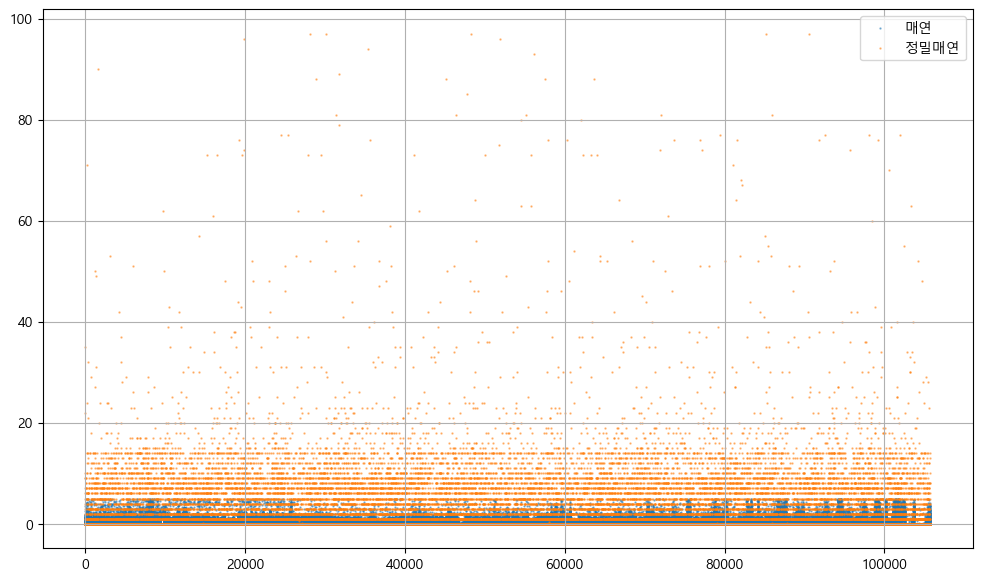

In [236]:
plt.figure(figsize=(12, 7))
plt.grid()
plt.scatter(die.index, die['Îß§Ïó∞'], s=.5, alpha=.5, label='Îß§Ïó∞')
plt.scatter(die.index, die['Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1'], s=.5, alpha=.5, label='Ï†ïÎ∞ÄÎß§Ïó∞')
plt.legend();

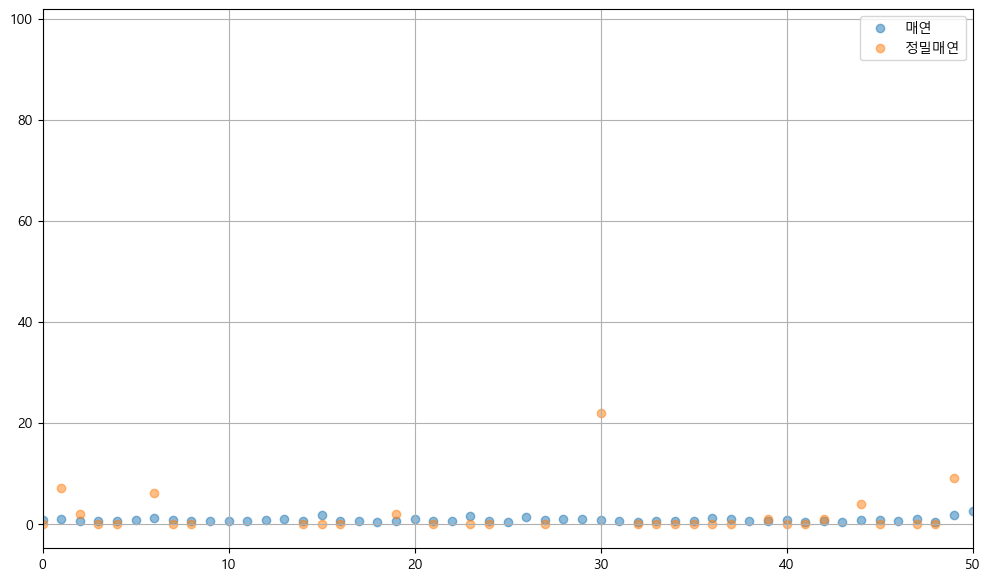

In [237]:
plt.figure(figsize=(12, 7))
plt.grid()
plt.scatter(die.index, die['Îß§Ïó∞'], alpha=.5, label='Îß§Ïó∞')
plt.scatter(die.index, die['Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1'], alpha=.5, label='Ï†ïÎ∞ÄÎß§Ïó∞')
plt.xlim([0, 50])
plt.legend();

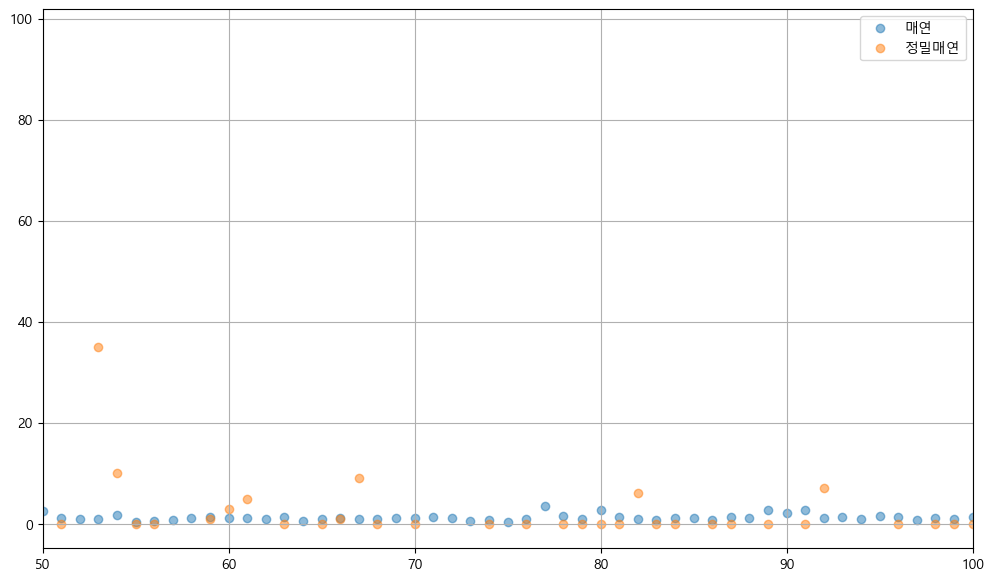

In [238]:
plt.figure(figsize=(12, 7))
plt.grid()
plt.scatter(die.index, die['Îß§Ïó∞'], alpha=.5, label='Îß§Ïó∞')
plt.scatter(die.index, die['Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1'], alpha=.5, label='Ï†ïÎ∞ÄÎß§Ïó∞')
plt.xlim([50, 100])
plt.legend();

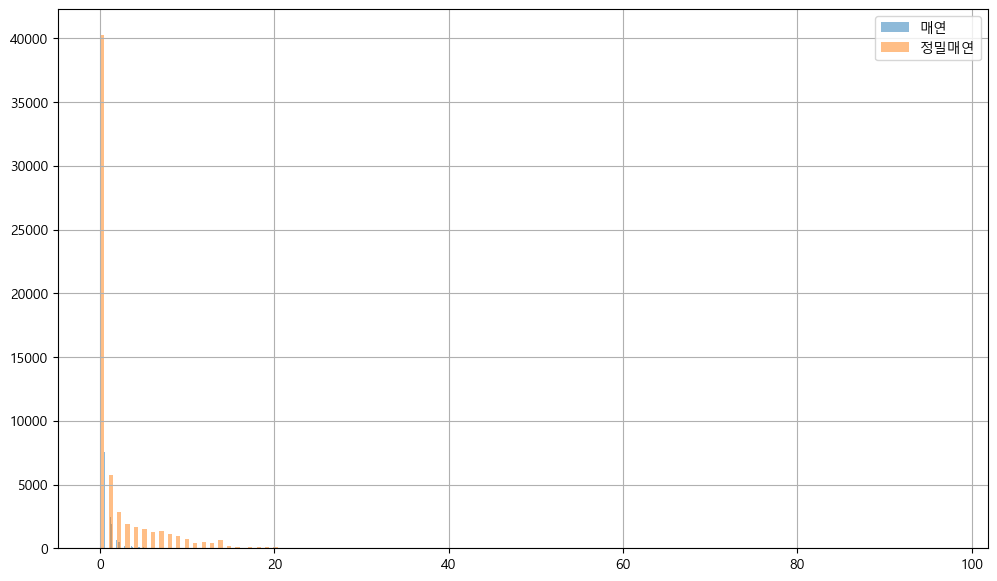

In [239]:
plt.figure(figsize=(12, 7))
plt.grid()
plt.hist(die['Îß§Ïó∞'], alpha=.5, label='Îß§Ïó∞', bins=200)
plt.hist(die['Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1'], alpha=.5, label='Ï†ïÎ∞ÄÎß§Ïó∞', bins=200)
plt.legend();

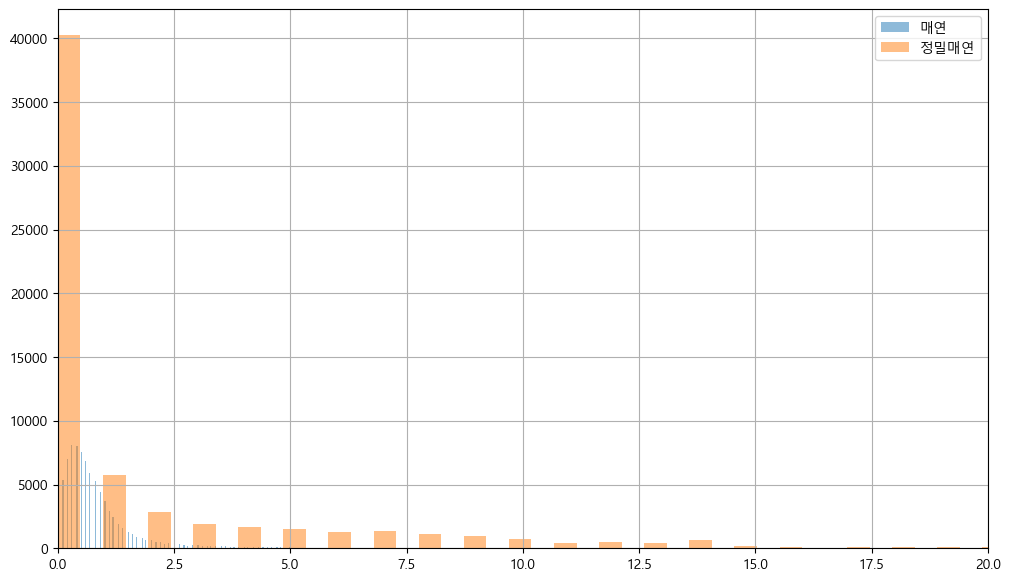

In [240]:
plt.figure(figsize=(12, 7))
plt.grid()
plt.hist(die['Îß§Ïó∞'], alpha=.5, label='Îß§Ïó∞', bins=200)
plt.hist(die['Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1'], alpha=.5, label='Ï†ïÎ∞ÄÎß§Ïó∞', bins=200)
plt.xlim([0, 20])
plt.legend();

### [‚ùå] 25\. Ï¢ÖÌï©Í≤ÄÏÇ¨Ïùò Îß§Ïó∞Ï∏°Ï†ïÍ≤∞Í≥º Î∂ÄÏ†ÅÌï©ÎπÑÏú®
- 20 ~ 22Î≤à ÌïúÎ≤àÏóê Ï≤òÎ¶¨

### [‚ùå] (Ï∞®ÌõÑ) 26\. Ï¢ÖÌï©Í≤ÄÏÇ¨Ïùò Îß§Ïó∞Ï∏°Ï†ïÍ∞í vs Îß§Ïó∞RSD Îß§Ïó∞Í∞í
- Q. 1ÎåÄ1 ÎπÑÍµê?

### Ï¢ÖÌï©Í≤ÄÏÇ¨ Îß§Ïó∞ Î∂ÄÏ†ÅÌï© Í≤ΩÏú†Ï∞® vs Îß§Ïó∞RSD Îß§Ïó∞Í∞í ÎπÑÍµê

### [‚ùå] (Ï∞®ÌõÑ) 27\. Ï¢ÖÌï©Í≤ÄÏÇ¨ Îß§Ïó∞ÎÜçÎèÑ vs Îß§Ïó∞RSD Îß§Ïó∞ÎÜçÎèÑ 1:1ÎπÑÍµê

## 28\. ÏãúÌóòÏùº ÌõÑ ÏµúÏ¥àÍ≤ÄÏÇ¨ Î∂ÄÏ†ÅÌï© - Îß§Ïó∞RSD Í∞í
- ÏµúÏ¥à Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ Î∂ÄÏ†ÅÌï© Ï∞®ÎüâÏùò Îß§Ïó∞RSD Í∞í ÌôïÏù∏ÌïòÏó¨ Ïò§Î•ò-Ï†ÅÌï©, Ïò§Î•ò-Î∂ÄÏ†ÅÌï© ÌôïÏù∏
- Í≥ºÏ†ï
    - 1. Ïú†Ìö®Îç∞Ïù¥ÌÑ∞(Îß§Ïó∞Ï†úÌïú ÏóÜÏùå) Ï§ë Í≤ΩÏú†Ï∞® Ï∂îÏ∂ú
    - 2. Ïö¥ÌñâÏ∞® Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ Í∏∞Ï§ÄÏúºÎ°ú Îß§Ïó∞RSD ÌåêÏ†ï Î∂ÄÏ†ÅÌï© Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
    - 3. Í≤ÄÏÇ¨ÏùºÏûê(Ï†ïÎ∞ÄÍ≤ÄÏÇ¨) - Í≤ÄÏÇ¨ÎÇ†Ïßú(ÏõêÍ≤©Ï∏°Ï†ï) = Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥
    - 4. 'Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥' > 0 Ïù∏ ÏÉòÌîå Ï∂îÏ∂ú
    - 5. 'Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥' Ïò§Î¶ÑÏ∞®Ïàú, ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏ Ï§ëÎ≥µ Ï†úÍ±∞
    - 6. Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1' ÎπÑÏú®

In [241]:
rcse.shape

(398673, 48)

In [242]:
rcse.columns

Index(['Ï∏°Ï†ïÎÇ†Ïßú', 'Ï∏°Ï†ïÏãúÍ∞Ñ', 'Í∏∞Î°ùÏÉÅÌÉú', 'Ïú†Ìö®', 'ÏÜçÎèÑ', 'Í∞ÄÏÜçÎèÑ', 'ÌîåÎûòÍ∑∏', 'VSP', 'Îß§Ïó∞', 'Ï∞®ÎüâÎ≤àÌò∏',
       'Ï∞®ÏÑ†Î≤àÌò∏', 'ÌíçÏÜç', 'ÏäµÎèÑ', 'Ïò®ÎèÑ', 'Ï∏°Ï†ïÏû•ÏÜåÏΩîÎìú', 'Ïó∞Î£å', 'Ïó∞Ïãù', 'Î∞∞Í∏∞Îüâ', 'Ï∞®Ï¢Ö', 'Ï¥ùÏ§ëÎüâ',
       'ÏóîÏßÑÌòïÏãù', 'Îì±Í∏â', 'Ï∞®ÎåÄÎ≤àÌò∏', 'Ï∞®Î™Ö', 'ÌèêÏ∞®Ïó¨Î∂Ä', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï¢ÖÎ•ò', 'Í¥ÄÎä•Í≤ÄÏÇ¨ÌåêÏ†ï',
       'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÌåêÏ†ï', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ï∏°Ï†ïÎ∞©Î≤ï', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò2',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò2', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï2', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò3', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï3',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï4', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò5',
       'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï5', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò6', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò6', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï6'],
      dtype

In [243]:
# 1. Í≤ΩÏú†Ï∞®(Îß§Ïó∞Ï†úÌïú ÏóÜÏùå) Ï§ë Ïú†Ìö®Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
# vdfRecordStatus = N, vdfValid = V, samFlag = V, Ï∞®ÎüâÎ≤àÌò∏ : nan, Ïò§Î•ò Í∞í(********) Ï†úÏô∏, Í≤ΩÏú†
sdie = rcse[(rcse['Í∏∞Î°ùÏÉÅÌÉú'] == 'N') & (rcse['Ïú†Ìö®'] == 'V') & (rcse['ÌîåÎûòÍ∑∏'] == 'V') & (rcse['Ï∞®ÎüâÎ≤àÌò∏'] != '********') & (rcse['Ï∞®ÎüâÎ≤àÌò∏'].isnull() == False) & (rcse['Ïó∞Î£å'] == 'Í≤ΩÏú†')].reset_index(drop=True)
sdie.shape

(108115, 48)

In [244]:
sdie['Ïó∞Î£å'].unique()

array(['Í≤ΩÏú†'], dtype=object)

In [245]:
# 2. Ïö¥ÌñâÏ∞® Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ Í∏∞Ï§ÄÏúºÎ°ú Îß§Ïó∞RSD ÌåêÏ†ï Î∂ÄÏ†ÅÌï© Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
sdf28 = sdie[sdie['Îß§Ïó∞'] > sdie['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1']].reset_index(drop=True)
sdf28.shape

(397, 48)

### [Ï∂úÎ†•] RSD Î∂ÄÏ†ÅÌï© Îç∞Ïù¥ÌÑ∞

In [246]:
# sdf28.to_excel(os.path.join(an_fold, 'RSDÎ∂ÄÏ†ÅÌï©_Í≤ΩÏú†.xlsx'), index=False)

In [247]:
sdf28[['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê', 'Ï∏°Ï†ïÎÇ†Ïßú']].dtypes

Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê    object
Ï∏°Ï†ïÎÇ†Ïßú      object
dtype: object

In [248]:
sdf28['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê'] = pd.to_datetime(sdf28['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê'])
sdf28['Ï∏°Ï†ïÎÇ†Ïßú'] = pd.to_datetime(sdf28['Ï∏°Ï†ïÎÇ†Ïßú'])
sdf28[['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê', 'Ï∏°Ï†ïÎÇ†Ïßú']].dtypes

Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê    datetime64[ns]
Ï∏°Ï†ïÎÇ†Ïßú      datetime64[ns]
dtype: object

In [249]:
# 3. Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê(Ï†ïÎ∞ÄÍ≤ÄÏÇ¨) - Ï∏°Ï†ïÎÇ†Ïßú(ÏõêÍ≤©Ï∏°Ï†ï) = Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥
sdf28['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'] = sdf28['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê'] - sdf28['Ï∏°Ï†ïÎÇ†Ïßú']
sdf28['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'] = sdf28['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'].astype('str')
sdf28['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'] = sdf28['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'].str.split(' ').str[0]
sdf28['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'] = pd.to_numeric(sdf28['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'], errors='coerce')

In [250]:
# 4. 'Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥' > 0 Ïù∏ ÏÉòÌîå Ï∂îÏ∂ú
sdf28 = sdf28[sdf28['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'] > 0].reset_index(drop=True)
sdf28.shape

(163, 49)

In [251]:
# 5. 'Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥' Ïò§Î¶ÑÏ∞®Ïàú
sdf28a = sdf28.sort_values('Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥').drop_duplicates('Ï∞®ÎüâÎ≤àÌò∏').reset_index(drop=True)
sdf28a.shape

(159, 49)

In [252]:
sdf28a[['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê', 'Ï∏°Ï†ïÎÇ†Ïßú', 'Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥']].head()

Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê       Ï∏°Ï†ïÎÇ†Ïßú  Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥
0 2023-08-25 2023-08-23       2
1 2023-04-06 2023-04-04       2
2 2023-01-05 2023-01-03       2
3 2023-07-29 2023-07-26       3
4 2023-07-31 2023-07-26       5

In [253]:
# 6. Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1' ÎπÑÏú®
grp28 = sdf28a['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1'].value_counts(dropna=False, normalize=True).reset_index()
grp28 = grp28.rename(columns={'index':'Îß§Ïó∞ÌåêÏ†ï', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1':'ÌåêÏ†ïÎπÑÏú®'})
grp28['ÌåêÏ†ïÎπÑÏú®'] = grp28['ÌåêÏ†ïÎπÑÏú®'].round(2)
grp28.loc[grp28.shape[0]] = ['Ï¥ùÌï©', round(grp28['ÌåêÏ†ïÎπÑÏú®'].sum(), 2)]
grp28

Îß§Ïó∞ÌåêÏ†ï  ÌåêÏ†ïÎπÑÏú®
0    Y  1.00
1   Ï¥ùÌï©  1.00

## 29\. ÏãúÌóòÏùº ÌõÑ ÏµúÏ¢ÖÍ≤ÄÏÇ¨ Î∂ÄÏ†ÅÌï© - Îß§Ïó∞RSDÍ∞í
- Í≥ºÏ†ï
    - 1. Ïú†Ìö®Îç∞Ïù¥ÌÑ∞(Îß§Ïó∞Ï†úÌïú ÏóÜÏùå) Ï§ë Í≤ΩÏú†Ï∞® Ï∂îÏ∂ú
    - 2. Ïö¥ÌñâÏ∞® Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ Í∏∞Ï§ÄÏúºÎ°ú Îß§Ïó∞RSD ÌåêÏ†ï Î∂ÄÏ†ÅÌï© Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
    - 3. Í≤ÄÏÇ¨ÏùºÏûê(Ï†ïÎ∞ÄÍ≤ÄÏÇ¨) - Í≤ÄÏÇ¨ÎÇ†Ïßú(ÏõêÍ≤©Ï∏°Ï†ï) = Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥
    - 4. 'Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥' > 0 Ïù∏ ÏÉòÌîå Ï∂îÏ∂ú
    - 5. 'Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥' ÎÇ¥Î¶ºÏ∞®Ïàú, ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏ Ï§ëÎ≥µ Ï†úÍ±∞
    - 6. Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1' ÎπÑÏú®

In [254]:
# 1 ~ 4. ÎèôÏùº Í≥ºÏ†ï
# 5. 'Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥' ÎÇ¥Î¶ºÏ∞®Ïàú
sdf29 = sdf28.sort_values('Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥', ascending=False).drop_duplicates('Ï∞®ÎüâÎ≤àÌò∏').reset_index(drop=True)
sdf29.shape

(159, 49)

In [255]:
sdf29[['Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê', 'Ï∏°Ï†ïÎÇ†Ïßú', 'Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥']].head()

Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ÏùºÏûê       Ï∏°Ï†ïÎÇ†Ïßú  Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥
0 2023-09-07 2022-10-18     324
1 2023-09-06 2022-10-24     317
2 2023-08-21 2022-10-24     301
3 2023-08-12 2022-10-18     298
4 2023-08-25 2022-11-21     277

In [256]:
# 6. Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1' ÎπÑÏú®
grp29 = sdf29['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1'].value_counts(dropna=False, normalize=True).reset_index()
grp29 = grp29.rename(columns={'index':'Îß§Ïó∞ÌåêÏ†ï', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1':'ÌåêÏ†ïÎπÑÏú®'})
grp29['ÌåêÏ†ïÎπÑÏú®'] = grp29['ÌåêÏ†ïÎπÑÏú®'].round(2)
grp29.loc[grp29.shape[0]] = ['Ï¥ùÌï©', round(grp29['ÌåêÏ†ïÎπÑÏú®'].sum(), 2)]
grp29

Îß§Ïó∞ÌåêÏ†ï  ÌåêÏ†ïÎπÑÏú®
0    Y  1.00
1   Ï¥ùÌï©  1.00

## Ï¢ÖÌï©Í≤ÄÏÇ¨ NOx Î∂ÄÏ†ÅÌï© Í≤ΩÏú†Ï∞® vs Îß§Ïó∞RSD Îß§Ïó∞Í∞í ÎπÑÍµê

### [‚ùå] (Ï∞®ÌõÑ) 30\. Ï¢ÖÌï©Í≤ÄÏÇ¨ NOx vs Îß§Ïó∞RSD Îß§Ïó∞ÎÜçÎèÑ 1:1ÎπÑÍµê

## Í≥†Ï†ïÏãù Îã§Ï∞®ÏÑ† Îß§Ïó∞ ÏõêÍ≤©Ï∏°Ï†ïÍ∏∞ Ïú†Ìö® Ï∏°Ï†ïÏàòÎüâ Í≤ÄÌÜ†

### [‚ùå] (Î≥¥Î•ò) 31\. ÏùºÏûêÎ≥Ñ Ïú†Ìö® Ï∏°Ï†ïÏàòÎüâ
- 1. Ï†ÑÏ≤¥ ÌÜµÍ≥º Ï∞®Îüâ Í±¥Ïàò : UFM ÏÇ¨ÏßÑÌååÏùº Ïàò Í∏∞Î°ù
- 2. Îã§Ï∞®ÏÑ† Îß§Ïó∞RSDÏ∏°Ï†ï Í±¥Ïàò : Ìï¥ÎãπÏùº Îß§Ïó∞RSDÏ∏°Ï†ï Ïú†Ìö®Îç∞Ïù¥ÌÑ∞ Í±¥Ïàò
- 3. Ïú†Ìö®Ïú® : bÎ≤à / aÎ≤à *100(%)

## Í≤∞Í≥º Ï∂úÎ†•

In [257]:
today_date = dt.datetime.today().strftime("%Y%m%d")
today_date

'20231020'

In [258]:
with pd.ExcelWriter(os.path.join(an_fold, f'Îß§Ïó∞RSDÏ∏°Ï†ïÍ≤∞Í≥º_Î∂ÑÏÑù(Ï†úÍ≥µÏ∞®ÎüâÏ†úÏõê)({today_date}).xlsx')) as writer:
    grp1.to_excel(writer, sheet_name='1_Ïó∞Î£åÎ≥Ñ', index=False)
    grp2.to_excel(writer, sheet_name='2_Í≤ΩÏú†_Ï∞®Ï¢ÖÎ≥Ñ', index=False)
    grp3.to_excel(writer, sheet_name='3_Í≤ΩÏú†_Ïó∞ÏãùÎ≥Ñ', index=False)
    grp4.to_excel(writer, sheet_name='4_Í≤ΩÏú†_Ï∞®ÏÑ†Î≥Ñ', index=False)
    grp5.to_excel(writer, sheet_name='5_Í≤ΩÏú†_ÏÜçÎèÑÎ≥Ñ', index=False)
    grp6.to_excel(writer, sheet_name='6_Í≤ΩÏú†_Î∞∞Ï∂úÍ∞ÄÏä§Îì±Í∏âÎ≥Ñ', index=False)
    grp7.to_excel(writer, sheet_name='7_Í≤ΩÏú†_Î∞∞Í∏∞ÎüâÎ≥Ñ', index=False)
    grp8.to_excel(writer, sheet_name='8_Í≤ΩÏú†_Ï∞®ÎüâÏ§ëÎüâÎ≥Ñ', index=False)
    grp9.to_excel(writer, sheet_name='9_Í≤ΩÏú†_Îß§Ïó∞ÌóàÏö©Í∏∞Ï§ÄÎ≥Ñ', index=False)
    grp10.to_excel(writer, sheet_name='10_Í≤ΩÏú†_NOxÌóàÏö©Í∏∞Ï§ÄÎ≥Ñ', index=False)

    grp11.to_excel(writer, sheet_name='11_ÎÜçÎèÑÎ≥Ñ', index=False)
    grp12.to_excel(writer, sheet_name='12_ÎÜçÎèÑ_Ï∞®Ï¢ÖÎ≥Ñ', index=True)
    grp13.to_excel(writer, sheet_name='13_ÎÜçÎèÑ_Ïó∞ÏãùÎ≥Ñ', index=True)
    grp14.to_excel(writer, sheet_name='14_ÎÜçÎèÑ_Ï∏°Ï†ïÏÜçÎèÑÎ≥Ñ', index=True)
    grp15.to_excel(writer, sheet_name='15_ÎÜçÎèÑ_Î∞∞Ï∂úÍ∞ÄÏä§Îì±Í∏âÎ≥Ñ', index=True)
    grp16.to_excel(writer, sheet_name='16_ÎÜçÎèÑ_Î∞∞Í∏∞ÎüâÎ≥Ñ', index=True)
    grp17.to_excel(writer, sheet_name='17_ÎÜçÎèÑ_Ï∞®ÎüâÏ§ëÎüâÎ≥Ñ', index=True)
    grp18.to_excel(writer, sheet_name='18_ÎÜçÎèÑ_Îß§Ïó∞ÌóàÏö©Í∏∞Ï§ÄÎ≥Ñ', index=True)
    grp19.to_excel(writer, sheet_name='19_ÎÜçÎèÑ_NOxÌóàÏö©Í∏∞Ï§ÄÎ≥Ñ', index=True)

    grp20.to_excel(writer, sheet_name='20_Îß§Ïó∞_Ï†ÅÌï©_Î∂ÄÏ†ÅÌï©ÎπÑÏú®(ÏÉÅÏúÑ10%)', index=False)
    grp21.to_excel(writer, sheet_name='21_Îß§Ïó∞_Ï†ÅÌï©_Î∂ÄÏ†ÅÌï©ÎπÑÏú®(ÌïòÏúÑ90%)', index=False)
    grp22.to_excel(writer, sheet_name='22_Îß§Ïó∞_Ï†ÅÌï©_Î∂ÄÏ†ÅÌï©ÎπÑÏú®(ÌïòÏúÑ10%)', index=False)
    grp23.to_excel(writer, sheet_name='23_ÏóîÏßÑÌòïÏãùÎ≥Ñ_Îß§Ïó∞_Ï†ïÎ∞ÄÎß§Ïó∞', index=False)
    # grp24.to_excel(writer, sheet_name='24_Îß§Ïó∞_Ï†ïÎ∞ÄÎß§Ïó∞_ÎπÑÍµê', index=False) # ÏãúÍ∞ÅÌôîÎ∞©Î≤ï Í≥†ÎØº
    # grp25.to_excel(writer, sheet_name='25_Îß§Ïó∞_Ï†ÅÌï©_Î∂ÄÏ†ÅÌï©ÎπÑÏú®', index=False) # 20 ~ 22Î≤à ÌïúÎ≤àÏóê Ï≤òÎ¶¨
    # grp26.to_excel(writer, sheet_name='26_Îß§Ïó∞Ï∏°Ï†ïÍ∞íÍ≥º_Îß§Ïó∞RSDÎπÑÍµê', index=False) # Ï∞®ÌõÑ ÎÖºÏùò

    # grp27.to_excel(writer, sheet_name='27_Îß§Ïó∞ÎÜçÎèÑÏôÄ_Îß§Ïó∞RSD_1ÎåÄ1ÎπÑÍµê', index=False) # Ï∞®ÌõÑ ÎÖºÏùò
    
    grp28.to_excel(writer, sheet_name='28_ÏãúÌóòÏùºÌõÑ_ÏµúÏ¥àÍ≤ÄÏÇ¨_Î∂ÄÏ†ÅÌï©', index=False) # Î¨∏Ïùò ÌïÑÏöî
    grp29.to_excel(writer, sheet_name='29_ÏãúÌóòÏùºÌõÑ_ÏµúÏ¢ÖÍ≤ÄÏÇ¨_Î∂ÄÏ†ÅÌï©', index=False) # Î¨∏Ïùò ÌïÑÏöî

    # grp30.to_excel(writer, sheet_name='30_Ï¢ÖÌï©Í≤ÄÏÇ¨NOxÏôÄ_RSDÎß§Ïó∞_1ÎåÄ1ÎπÑÍµê', index=False) # Ï∞®ÌõÑ ÎÖºÏùò

    # grp31.to_excel(writer, sheet_name='31_ÏùºÏûêÎ≥Ñ_Ïú†Ìö®_Ï∏°Ï†ïÏàòÎüâ', index=False) # Î≥¥Î•ò

In [259]:
sec = time.time() - start_time
print(str(dt.timedelta(seconds=sec)).split('.')[0])

0:00:20


# End